In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/google_stock.csv')

df.head(10)

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,19-08-2004,2.390042,2.490664,897427216,2.591785,2.499133,2.499133
1,20-08-2004,2.503118,2.515820,458857488,2.716817,2.697639,2.697639
2,23-08-2004,2.716070,2.758411,366857939,2.826406,2.724787,2.724787
3,24-08-2004,2.579581,2.770615,306396159,2.779581,2.611960,2.611960
4,25-08-2004,2.587302,2.614201,184645512,2.689918,2.640104,2.640104
5,26-08-2004,2.606729,2.613952,142572401,2.688672,2.687676,2.687676
6,27-08-2004,2.632383,2.692408,124826132,2.705360,2.643840,2.643840
7,30-08-2004,2.540727,2.622171,104429967,2.627402,2.540727,2.540727
8,31-08-2004,2.544463,2.547950,98825037,2.583068,2.549693,2.549693
9,01-09-2004,2.482445,2.557912,183633734,2.564637,2.496891,2.496891


In [24]:
df.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,4612.000000,4612.000000,4.612000e+03,4612.000000,4612.000000,4612.000000
mean,37.088474,37.471847,1.238896e+08,37.856624,37.477273,37.477273
std,34.791176,35.163155,1.536223e+08,35.549294,35.170034,35.170034
min,2.390042,2.470490,1.584340e+05,2.534002,2.490913,2.490913
25%,12.401765,12.575302,2.992850e+07,12.697718,12.576174,12.576174
50%,22.808758,22.980115,6.869051e+07,23.098795,22.954461,22.954461
75%,52.975875,53.578501,1.549155e+08,54.106961,53.534375,53.534375
max,149.887497,151.863495,1.650833e+09,152.100006,150.709000,150.709000


<ipython-input-25-0415697ba626>:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


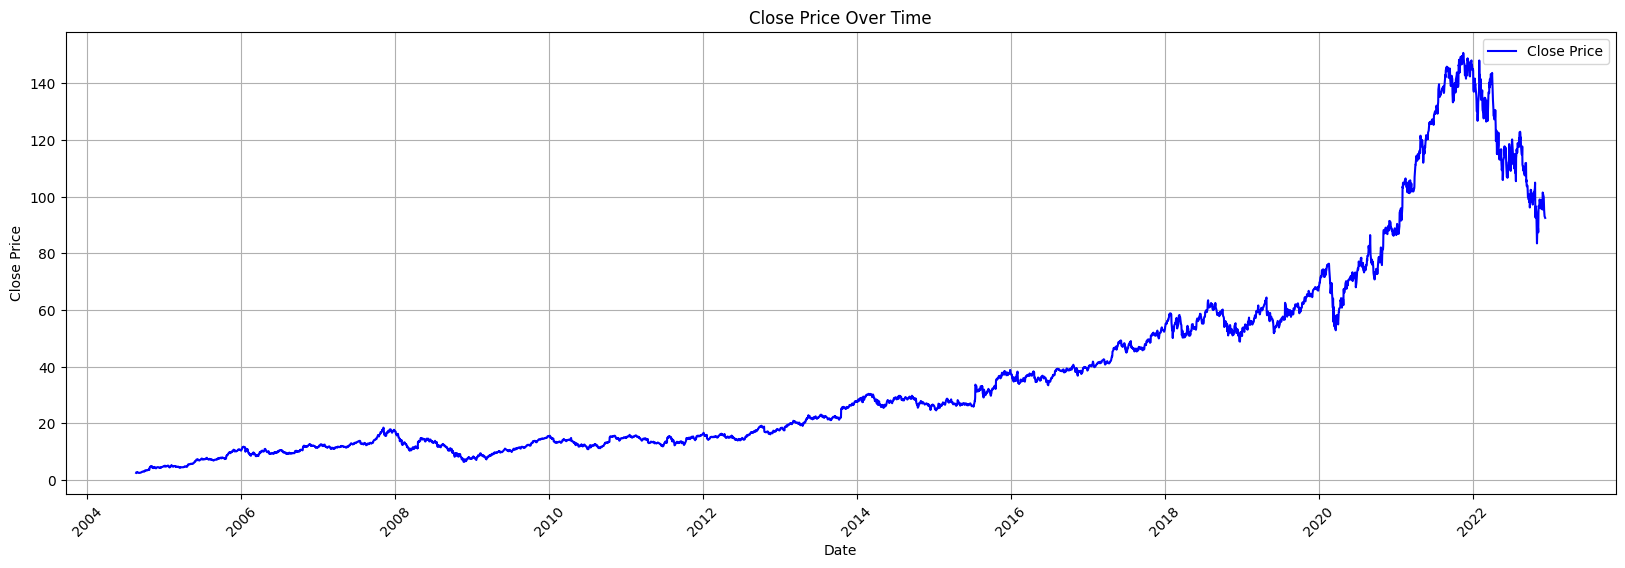

In [25]:
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])

# Plot the Close Price over time
plt.figure(figsize=(20, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# Baseline RNN

In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


def create_sequences(data_features, data_target, step_size, prediction_horizon):
    X, y = [], []
    for i in range(len(data_features) - step_size - prediction_horizon + 1):
        X.append(data_features[i:i + step_size])  # Use `step_size` days as input
        y.append(data_target[i + step_size + prediction_horizon - 1])  # Predict future value
    return np.array(X), np.array(y)


step_size = 60  # Number of past days to use as input
prediction_horizon = 1
X_rnn, y_rnn = create_sequences(data_features, data_target, step_size, prediction_horizon)

# Chronological split for time series data
train_size = int(0.7 * len(X_rnn))  # 70% for training
val_size = int(0.15 * len(X_rnn))   # 15% for validation
test_size = len(X_rnn) - train_size - val_size  # Remaining 15% for testing

X_train_rnn = X_rnn[:train_size]
y_train_rnn = y_rnn[:train_size]

X_val_rnn = X_rnn[train_size:train_size + val_size]
y_val_rnn = y_rnn[train_size:train_size + val_size]

X_test_rnn = X_rnn[train_size + val_size:]
y_test_rnn = y_rnn[train_size + val_size:]

print(f"Training set: {X_train_rnn.shape}, Validation set: {X_val_rnn.shape}, Test set: {X_test_rnn.shape}")


scaler_X_rnn = MinMaxScaler()
scaler_y_rnn = MinMaxScaler()


X_train_scaled_rnn = scaler_X_rnn.fit_transform(X_train_rnn.reshape(-1, X_train_rnn.shape[2])).reshape(X_train_rnn.shape)
X_val_scaled_rnn = scaler_X_rnn.transform(X_val_rnn.reshape(-1, X_val_rnn.shape[2])).reshape(X_val_rnn.shape)
X_test_scaled_rnn = scaler_X_rnn.transform(X_test_rnn.reshape(-1, X_test_rnn.shape[2])).reshape(X_test_rnn.shape)


y_train_scaled_rnn = scaler_y_rnn.fit_transform(y_train_rnn.reshape(-1, 1))
y_val_scaled_rnn = scaler_y_rnn.transform(y_val_rnn.reshape(-1, 1))
y_test_scaled_rnn = scaler_y_rnn.transform(y_test_rnn.reshape(-1, 1))

# Print scaled target ranges for debugging
print(f"Training Target Range (Scaled): {y_train_scaled_rnn.min()} - {y_train_scaled_rnn.max()}")
print(f"Validation Target Range (Scaled): {y_val_scaled_rnn.min()} - {y_val_scaled_rnn.max()}")
print(f"Test Target Range (Scaled): {y_test_scaled_rnn.min()} - {y_test_scaled_rnn.max()}")


Training set: (3186, 60, 4), Validation set: (682, 60, 4), Test set: (684, 60, 4)
Training Target Range (Scaled): 0.0 - 0.9999999999999999
Validation Target Range (Scaled): 0.9145588059005835 - 1.6023819328212012
Test Target Range (Scaled): 1.126686504522318 - 3.252511564715034


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout


model_rnn = Sequential([

    SimpleRNN(64, return_sequences=True, input_shape=(step_size, X_train_scaled_rnn.shape[2])),
    Dropout(0.2),


    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),

    # Fully connected dense layers
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='huber', metrics=['mae'])

# Print model summary
model_rnn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 60, 64)              │           4,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,785 (57.75 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping_rnn = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the RNN model
history_rnn = model_rnn.fit(
    X_train_scaled_rnn, y_train_scaled_rnn,
    validation_data=(X_val_scaled_rnn, y_val_scaled_rnn),
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping_rnn],
    verbose=1
)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.0141 - mae: 0.1174 - val_loss: 0.0323 - val_mae: 0.2353
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0022 - mae: 0.0492 - val_loss: 0.0201 - val_mae: 0.1802
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0014 - mae: 0.0398 - val_loss: 0.0268 - val_mae: 0.2158
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0012 - mae: 0.0358 - val_loss: 0.0193 - val_mae: 0.1771
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.7722e-04 - mae: 0.0326 - val_loss: 0.0141 - val_mae: 0.1465
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 8.8757e-04 - mae: 0.0306 - val_loss: 0.0183 - val_mae: 0.1740
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 7.8963e-04 - mae: 0.0294 - val_loss: 0.0249 - val_mae: 0.2058
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 6.8857e-04 - mae: 0.0270 - val_loss: 0.0210 - val_mae: 0.1887
Epoch 9/50
200/200 ━━━━━━━━━━━━

Test Loss (RNN): 0.4272
Test MAE (RNN): 0.8397
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


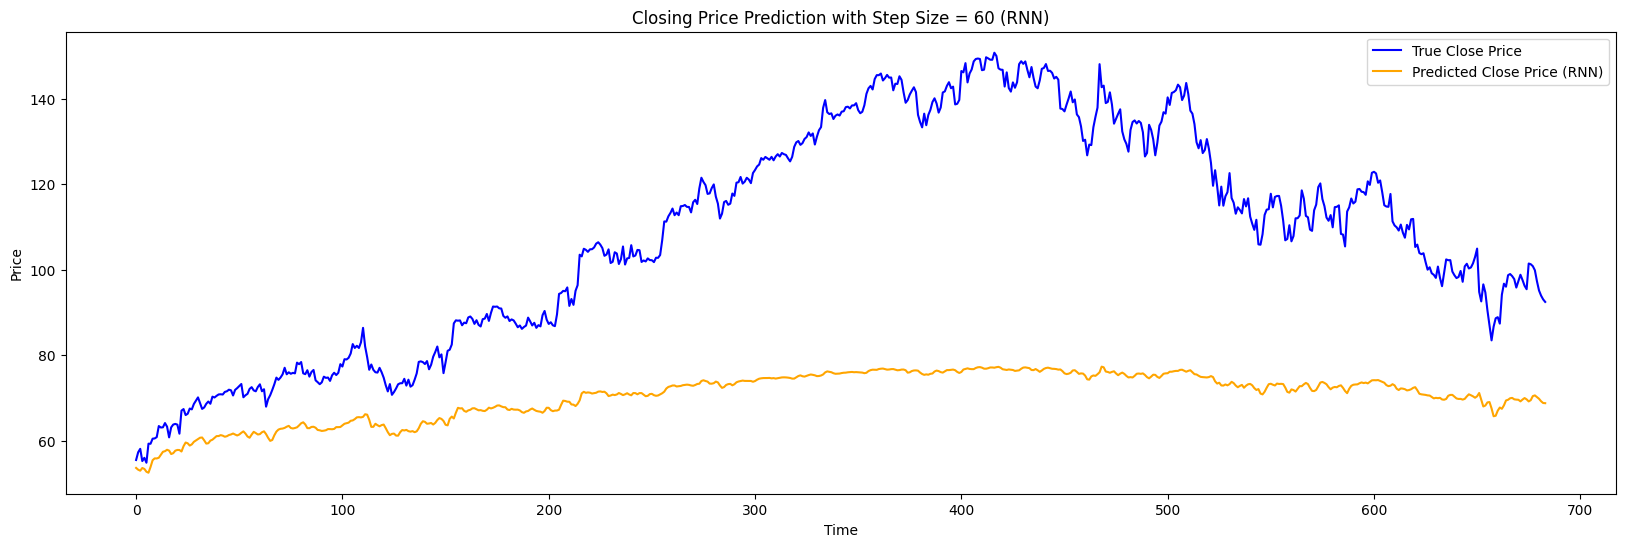

In [29]:
# Evaluate on the test set
loss_rnn, mae_rnn = model_rnn.evaluate(X_test_scaled_rnn, y_test_scaled_rnn, verbose=0)
print(f"Test Loss (RNN): {loss_rnn:.4f}")
print(f"Test MAE (RNN): {mae_rnn:.4f}")

# Make predictions
y_pred_scaled_rnn = model_rnn.predict(X_test_scaled_rnn)

# Reverse scaling for predictions and true values
y_pred_rnn = scaler_y_rnn.inverse_transform(y_pred_scaled_rnn)
y_test_original_rnn = scaler_y_rnn.inverse_transform(y_test_scaled_rnn)

# Ensure predictions match the length of test data
y_pred_rnn = y_pred_rnn[:len(y_test_original_rnn)]

# Visualization
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test_original_rnn)), y_test_original_rnn, label='True Close Price', color='blue')
plt.plot(range(len(y_pred_rnn)), y_pred_rnn, label='Predicted Close Price (RNN)', color='orange')
plt.title(f'Closing Price Prediction with Step Size = {step_size} (RNN)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


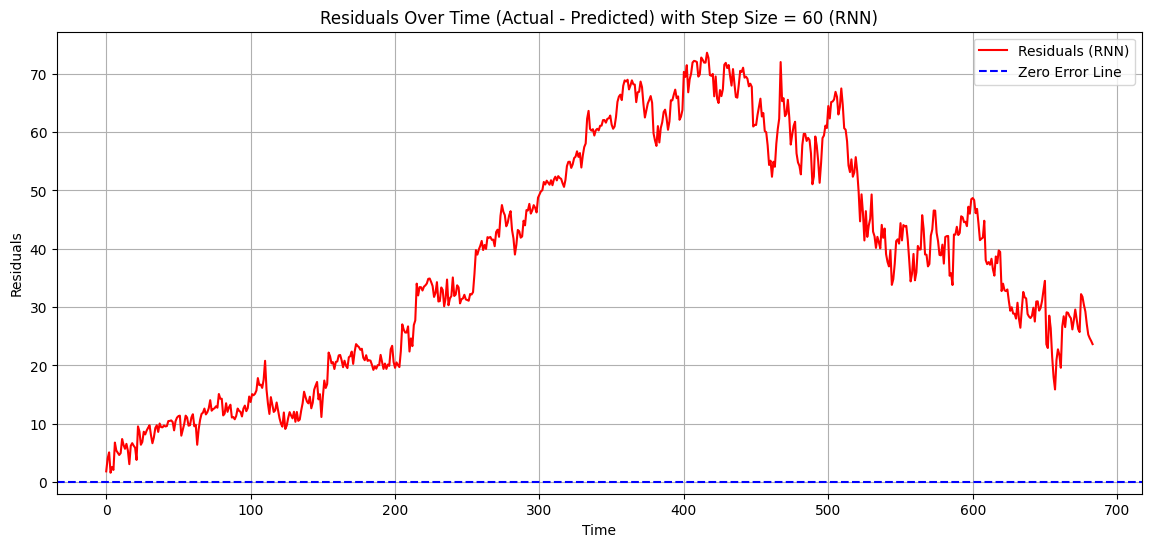

In [30]:
# Ensure predictions match the length of test data
y_pred_rnn = y_pred_rnn[:len(y_test_original_rnn)]

# Calculate residuals
residuals_rnn = y_test_original_rnn - y_pred_rnn

# Plot residuals over time
plt.figure(figsize=(14, 6))
plt.plot(range(len(residuals_rnn)), residuals_rnn, color='red', label='Residuals (RNN)')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Error Line')
plt.title(f'Residuals Over Time (Actual - Predicted) with Step Size = {step_size} (RNN)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


# LSTM for Close Price

In [31]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [36]:

features = ['Open', 'High', 'Low', 'Volume']  # Input features
target = 'Close'  # Target variable
data_features = df[features].values
data_target = df[target].values

#
N = 60
M = 1
def create_sequences(data_features, data_target, N, M):
    X, y = [], []
    for i in range(len(data_features) - N - M + 1):
        X.append(data_features[i:i + N])  # Past N days
        y.append(data_target[i + N:i + N + M])  # Next M days
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(data_features, data_target, N, M)

# Perform chronological split
train_size = int(0.7 * len(X_lstm))
val_size = int(0.15 * len(X_lstm))
test_size = len(X_lstm) - train_size - val_size

X_train_lstm = X_lstm[:train_size]
y_train_lstm = y_lstm[:train_size]
X_val_lstm = X_lstm[train_size:train_size + val_size]
y_val_lstm = y_lstm[train_size:train_size + val_size]
X_test_lstm = X_lstm[train_size + val_size:]
y_test_lstm = y_lstm[train_size + val_size:]

# Initialize scalers
from sklearn.preprocessing import MinMaxScaler
scaler_X_lstm = MinMaxScaler()
scaler_y_lstm = MinMaxScaler()

# Scale features
X_train_scaled_lstm = scaler_X_lstm.fit_transform(X_train_lstm.reshape(-1, X_train_lstm.shape[2])).reshape(X_train_lstm.shape)
X_val_scaled_lstm = scaler_X_lstm.transform(X_val_lstm.reshape(-1, X_val_lstm.shape[2])).reshape(X_val_lstm.shape)
X_test_scaled_lstm = scaler_X_lstm.transform(X_test_lstm.reshape(-1, X_test_lstm.shape[2])).reshape(X_test_lstm.shape)

# Scale target
y_train_scaled_lstm = scaler_y_lstm.fit_transform(y_train_lstm.reshape(-1, 1))
y_val_scaled_lstm = scaler_y_lstm.transform(y_val_lstm.reshape(-1, 1))
y_test_scaled_lstm = scaler_y_lstm.transform(y_test_lstm.reshape(-1, 1))


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


model_lstm = Sequential([

    LSTM(128, return_sequences=True, input_shape=(N, X_train_scaled_lstm.shape[2])),
    Dropout(0.3),


    LSTM(128, return_sequences=False),
    Dropout(0.3),


    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model_lstm.compile(
    optimizer='adam',
    loss='huber',
    metrics=['mae']
)

# Display the model summary
model_lstm.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208,001 (812.50 KB)

 Trainable params: 208,001 (812.50 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping_lstm = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the LSTM model
history_lstm = model_lstm.fit(
    X_train_scaled_lstm,
    y_train_scaled_lstm,
    validation_data=(X_val_scaled_lstm, y_val_scaled_lstm),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_lstm],
    verbose=1
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0088 - mae: 0.0741 - val_loss: 0.0021 - val_mae: 0.0536
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.3124e-04 - mae: 0.0246 - val_loss: 0.0041 - val_mae: 0.0811
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.6818e-04 - mae: 0.0230 - val_loss: 0.0113 - val_mae: 0.1424
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.9725e-04 - mae: 0.0231 - val_loss: 0.0030 - val_mae: 0.0681
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.5510e-04 - mae: 0.0234 - val_loss: 0.0030 - val_mae: 0.0661
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9050e-04 - mae: 0.0190 - val_loss: 0.0011 - val_mae: 0.0358
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7081e-04 - mae: 0.0205 - val_loss: 0.0037 - val_mae: 0.0766
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7707e-04 - mae: 0.0187 - val_loss: 0.0031 - val_mae: 0.0692
Epoch 9/50
100/100 ━

Test Loss (LSTM): 0.0405
Test MAE (LSTM): 0.2217
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


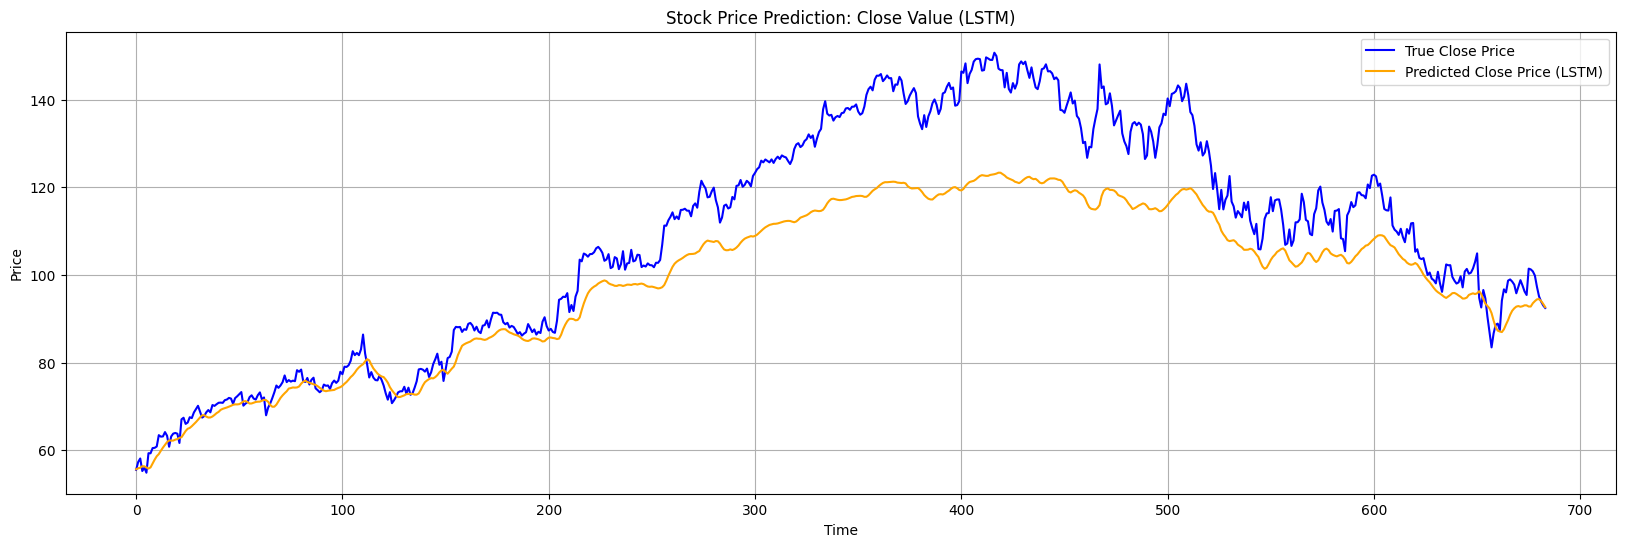

In [39]:
# Evaluate the LSTM model on the test set
loss_lstm, mae_lstm = model_lstm.evaluate(
    X_test_scaled_lstm,
    y_test_scaled_lstm,
    verbose=0
)
print(f"Test Loss (LSTM): {loss_lstm:.4f}")
print(f"Test MAE (LSTM): {mae_lstm:.4f}")


y_pred_scaled_lstm = model_lstm.predict(X_test_scaled_lstm)


y_pred_lstm = scaler_y_lstm.inverse_transform(y_pred_scaled_lstm)
y_test_original_lstm = scaler_y_lstm.inverse_transform(y_test_scaled_lstm)


y_pred_lstm = y_pred_lstm[:len(y_test_original_lstm)]

# Visualization
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test_original_lstm)), y_test_original_lstm, label='True Close Price', color='blue')
plt.plot(range(len(y_pred_lstm)), y_pred_lstm, label='Predicted Close Price (LSTM)', color='orange')
plt.title('Stock Price Prediction: Close Value (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


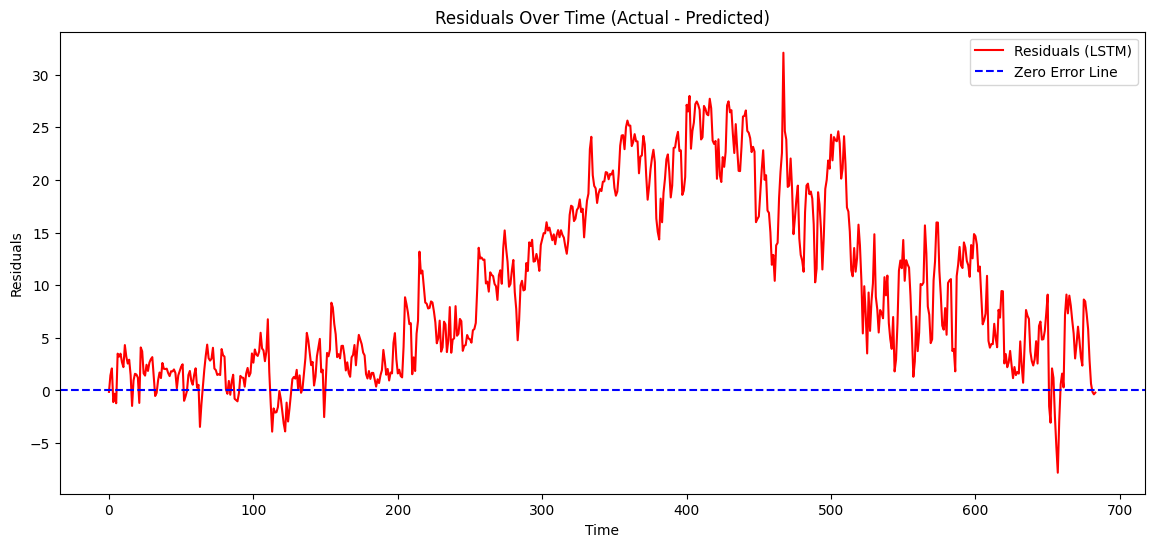

In [40]:

y_test_original_lstm = y_test_original_lstm.reshape(-1, 1)
y_pred_lstm = y_pred_lstm.reshape(-1, 1)


residuals_lstm = y_test_original_lstm - y_pred_lstm
residuals_lstm = residuals_lstm.flatten()


plt.figure(figsize=(14, 6))
plt.plot(residuals_lstm, color='red', label='Residuals (LSTM)')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Error Line')
plt.title('Residuals Over Time (Actual - Predicted)')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


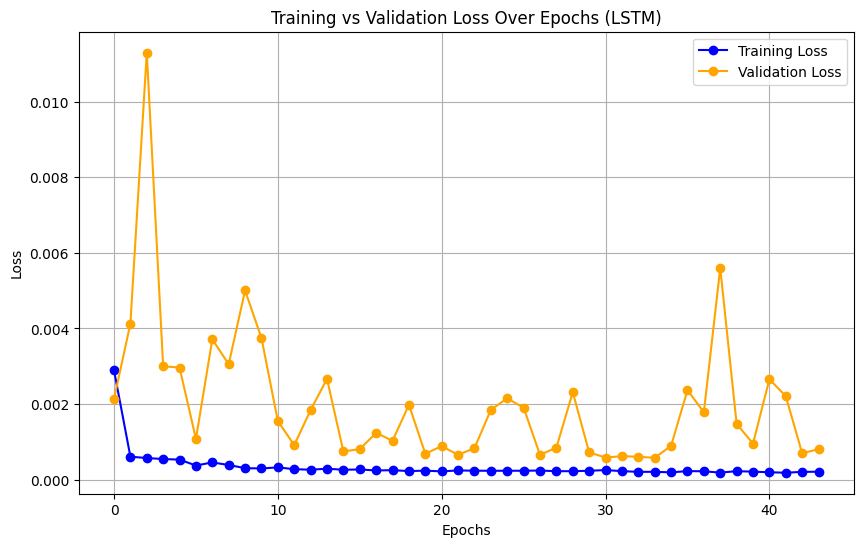

In [41]:

training_loss_lstm = history_lstm.history['loss']
validation_loss_lstm = history_lstm.history['val_loss']


plt.figure(figsize=(10, 6))
plt.plot(training_loss_lstm, label='Training Loss', color='blue', marker='o')
plt.plot(validation_loss_lstm, label='Validation Loss', color='orange', marker='o')
plt.title('Training vs Validation Loss Over Epochs (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# LSTM with better Architecture

In [42]:

features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
data_features = df[features].values
data_target = df[target].values


N = 60
M = 1
def create_sequences(data_features, data_target, N, M):
    X, y = [], []
    for i in range(len(data_features) - N - M + 1):
        X.append(data_features[i:i + N])
        y.append(data_target[i + N:i + N + M])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(data_features, data_target, N, M)

# Perform chronological split
train_size = int(0.7 * len(X_lstm))
val_size = int(0.15 * len(X_lstm))
test_size = len(X_lstm) - train_size - val_size

X_train_lstm = X_lstm[:train_size]
y_train_lstm = y_lstm[:train_size]
X_val_lstm = X_lstm[train_size:train_size + val_size]
y_val_lstm = y_lstm[train_size:train_size + val_size]
X_test_lstm = X_lstm[train_size + val_size:]
y_test_lstm = y_lstm[train_size + val_size:]

# Initialize scalers
from sklearn.preprocessing import MinMaxScaler
scaler_X_lstm = MinMaxScaler()
scaler_y_lstm = MinMaxScaler()

# Scale features
X_train_scaled_lstm = scaler_X_lstm.fit_transform(X_train_lstm.reshape(-1, X_train_lstm.shape[2])).reshape(X_train_lstm.shape)
X_val_scaled_lstm = scaler_X_lstm.transform(X_val_lstm.reshape(-1, X_val_lstm.shape[2])).reshape(X_val_lstm.shape)
X_test_scaled_lstm = scaler_X_lstm.transform(X_test_lstm.reshape(-1, X_test_lstm.shape[2])).reshape(X_test_lstm.shape)

# Scale target
y_train_scaled_lstm = scaler_y_lstm.fit_transform(y_train_lstm.reshape(-1, 1))
y_val_scaled_lstm = scaler_y_lstm.transform(y_val_lstm.reshape(-1, 1))
y_test_scaled_lstm = scaler_y_lstm.transform(y_test_lstm.reshape(-1, 1))


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Multi-Layer LSTM Model
model_lstm_multi = Sequential([
    # First LSTM layer with 256 units
    LSTM(256, return_sequences=True, input_shape=(N, X_train_scaled_lstm.shape[2])),
    Dropout(0.3),  # Dropout to reduce overfitting

    # Second LSTM layer with 128 units
    LSTM(128, return_sequences=True),
    Dropout(0.3),

    # Third LSTM layer with 64 units
    LSTM(64, return_sequences=False),
    Dropout(0.3),

    # Fully connected dense layers
    Dense(32, activation='relu'),  # Dense layer with 32 units
    Dense(1)  # Output layer predicting the target value
])

# Compile the model
model_lstm_multi.compile(
    optimizer='adam',  # Adam optimizer for better convergence
    loss='huber',      # Huber loss for robust regression
    metrics=['mae']    # Mean Absolute Error as performance metric
)

# Display the model summary
model_lstm_multi.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 256)             │         267,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 60, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 60, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 515,905 (1.97 MB)

 Trainable params: 515,905 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from tensorflow.keras.layers import Bidirectional

# Bidirectional LSTM Model
model_bidirectional_lstm = Sequential([
    # First Bidirectional LSTM layer
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(N, X_train_scaled_lstm.shape[2])),
    Dropout(0.3),  # Dropout to reduce overfitting

    # Second Bidirectional LSTM layer
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.3),

    # Fully connected dense layers
    Dense(64, activation='relu'),  # Dense layer with 64 units
    Dense(1)  # Output layer predicting the target value
])

# Compile the model
model_bidirectional_lstm.compile(
    optimizer='adam',  # Adam optimizer for better convergence
    loss='huber',      # Huber loss for robust regression
    metrics=['mae']    # Mean Absolute Error as performance metric
)

# Display the model summary
model_bidirectional_lstm.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 60, 256)             │         136,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 60, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 546,945 (2.09 MB)

 Trainable params: 546,945 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train Multi-Layer LSTM
history_lstm_multi = model_lstm_multi.fit(
    X_train_scaled_lstm, y_train_scaled_lstm,
    validation_data=(X_val_scaled_lstm, y_val_scaled_lstm),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Train Bidirectional LSTM
history_bidirectional_lstm = model_bidirectional_lstm.fit(
    X_train_scaled_lstm, y_train_scaled_lstm,
    validation_data=(X_val_scaled_lstm, y_val_scaled_lstm),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0093 - mae: 0.0786 - val_loss: 0.0028 - val_mae: 0.0595
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0011 - mae: 0.0318 - val_loss: 0.0117 - val_mae: 0.1425
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010 - mae: 0.0295 - val_loss: 0.0044 - val_mae: 0.0800
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.9124e-04 - mae: 0.0248 - val_loss: 0.0049 - val_mae: 0.0844
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.8874e-04 - mae: 0.0243 - val_loss: 0.0105 - val_mae: 0.1336
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.5126e-04 - mae: 0.0228 - val_loss: 0.0081 - val_mae: 0.1160
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.6459e-04 - mae: 0.0227 - val_loss: 0.0075 - val_mae: 0.1098
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.0026e-04 - mae: 0.0215 - val_loss: 0.0131 - val_mae: 0.1518
Epoch 9/50
100/100 ━━━━━━━━━

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


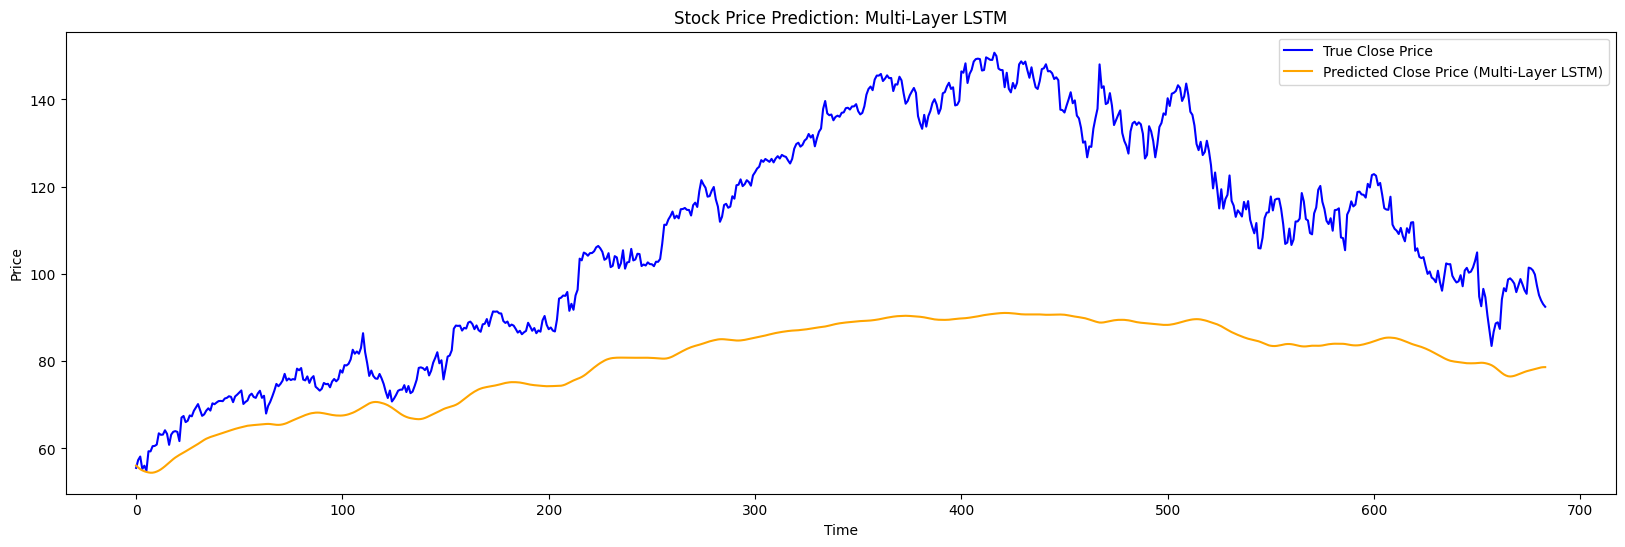

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


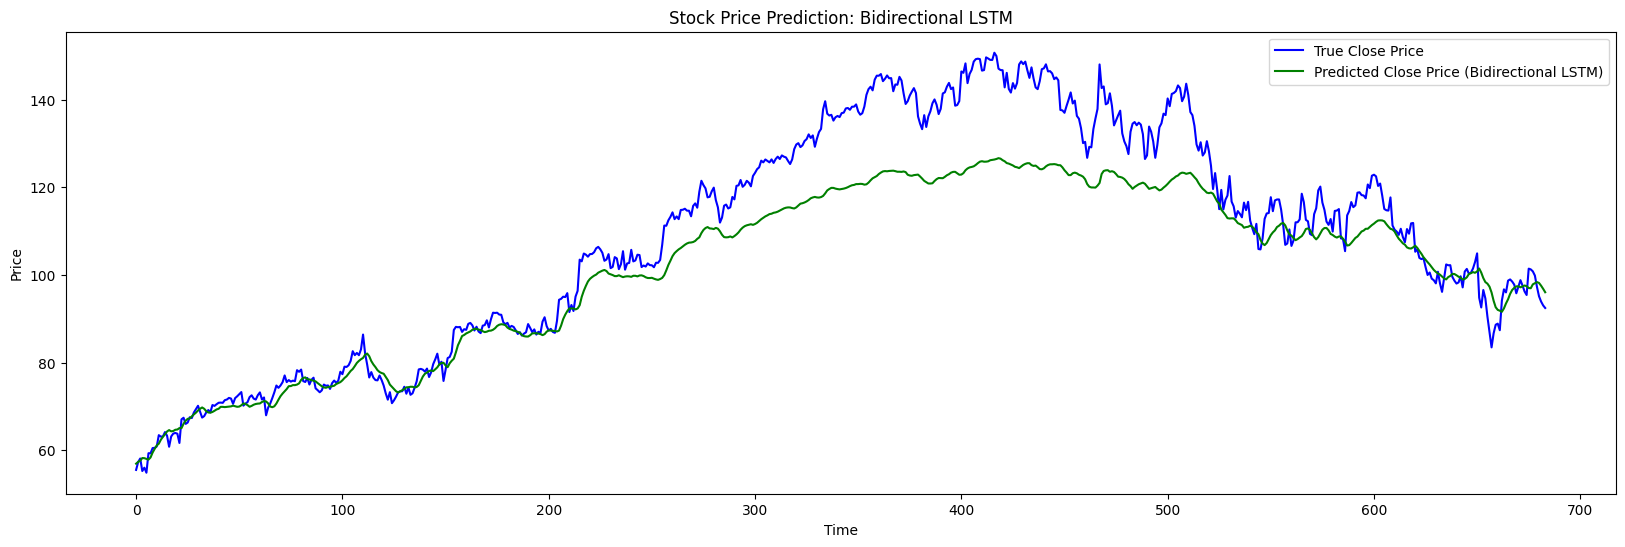

In [46]:
# Evaluate Multi-Layer LSTM
loss_multi, mae_multi = model_lstm_multi.evaluate(X_test_scaled_lstm, y_test_scaled_lstm, verbose=0)
y_pred_scaled_multi = model_lstm_multi.predict(X_test_scaled_lstm)
y_pred_multi = scaler_y_lstm.inverse_transform(y_pred_scaled_multi)
y_test_original_multi = scaler_y_lstm.inverse_transform(y_test_scaled_lstm)

plt.figure(figsize=(20, 6))
plt.plot(y_test_original_multi, label='True Close Price', color='blue')
plt.plot(y_pred_multi, label='Predicted Close Price (Multi-Layer LSTM)', color='orange')
plt.title('Stock Price Prediction: Multi-Layer LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate Bidirectional LSTM
loss_bi, mae_bi = model_bidirectional_lstm.evaluate(X_test_scaled_lstm, y_test_scaled_lstm, verbose=0)
y_pred_scaled_bi = model_bidirectional_lstm.predict(X_test_scaled_lstm)
y_pred_bi = scaler_y_lstm.inverse_transform(y_pred_scaled_bi)
y_test_original_bi = scaler_y_lstm.inverse_transform(y_test_scaled_lstm)

plt.figure(figsize=(20, 6))
plt.plot(y_test_original_bi, label='True Close Price', color='blue')
plt.plot(y_pred_bi, label='Predicted Close Price (Bidirectional LSTM)', color='green')
plt.title('Stock Price Prediction: Bidirectional LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# LSTM DRNN

In [49]:

train_size = int(0.7 * len(X))  # 70% for training
val_size = int(0.15 * len(X))   # 15% for validation
test_size = len(X) - train_size - val_size  # Remaining 15% for testing


X_train_drnn = X[:train_size]
y_train_drnn = y[:train_size]

X_val_drnn = X[train_size:train_size + val_size]
y_val_drnn = y[train_size:train_size + val_size]

X_test_drnn = X[train_size + val_size:]
y_test_drnn = y[train_size + val_size:]


print(f"Training set: {X_train_drnn.shape}, Validation set: {X_val_drnn.shape}, Test set: {X_test_drnn.shape}")




scaler_X_drnn = MinMaxScaler()
scaler_y_drnn = MinMaxScaler()

# Scale features (X)
X_train_scaled_drnn = scaler_X_drnn.fit_transform(X_train_drnn.reshape(-1, X_train_drnn.shape[2])).reshape(X_train_drnn.shape)
X_val_scaled_drnn = scaler_X_drnn.transform(X_val_drnn.reshape(-1, X_val_drnn.shape[2])).reshape(X_val_drnn.shape)
X_test_scaled_drnn = scaler_X_drnn.transform(X_test_drnn.reshape(-1, X_test_drnn.shape[2])).reshape(X_test_drnn.shape)

# Scale target (y)
y_train_scaled_drnn = scaler_y_drnn.fit_transform(y_train_drnn.reshape(-1, 1))
y_val_scaled_drnn = scaler_y_drnn.transform(y_val_drnn.reshape(-1, 1))
y_test_scaled_drnn = scaler_y_drnn.transform(y_test_drnn.reshape(-1, 1))

# Verify the scaling
print(f"Scaled Training Target Range: {y_train_scaled_drnn.min()} - {y_train_scaled_drnn.max()}")
print(f"Scaled Validation Target Range: {y_val_scaled_drnn.min()} - {y_val_scaled_drnn.max()}")
print(f"Scaled Test Target Range: {y_test_scaled_drnn.min()} - {y_test_scaled_drnn.max()}")



Training set: (3186, 60, 4), Validation set: (682, 60, 4), Test set: (684, 60, 4)
Scaled Training Target Range: 0.0 - 0.9999999999999999
Scaled Validation Target Range: 0.9145588059005835 - 1.6023819328212012
Scaled Test Target Range: 1.126686504522318 - 3.252511564715034


In [50]:
# Build the LSTM-based DRNN model
model_drnn = Sequential([
    # First LSTM layer (returns sequences)
    LSTM(128, return_sequences=True, input_shape=(N, X_train_scaled_drnn.shape[2])),  # Updated input shape
    Dropout(0.3),

    # Second LSTM layer (returns sequences for the next layer)
    LSTM(128, return_sequences=True),
    Dropout(0.3),

    # Third LSTM layer (does not return sequences, outputs final representation)
    LSTM(128, return_sequences=False),
    Dropout(0.3),

    # Fully connected layer
    Dense(64, activation='relu'),
    Dense(1)  # Predicting the 'Close' value
])

# Compile the DRNN model with Huber loss
model_drnn.compile(optimizer='adam', loss='huber', metrics=['mae'])
model_drnn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 60, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 60, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 339,585 (1.30 MB)

 Trainable params: 339,585 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stopping_drnn = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the DRNN model
history_drnn = model_drnn.fit(
    X_train_scaled_drnn, y_train_scaled_drnn,
    validation_data=(X_val_scaled_drnn, y_val_scaled_drnn),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_drnn],
    verbose=1
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0097 - mae: 0.0742 - val_loss: 0.0019 - val_mae: 0.0465
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.1739e-04 - mae: 0.0301 - val_loss: 0.0049 - val_mae: 0.0817
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.4093e-04 - mae: 0.0262 - val_loss: 0.0056 - val_mae: 0.0924
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.2366e-04 - mae: 0.0240 - val_loss: 0.0021 - val_mae: 0.0502
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.3752e-04 - mae: 0.0225 - val_loss: 0.0049 - val_mae: 0.0855
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.8471e-04 - mae: 0.0212 - val_loss: 0.0077 - val_mae: 0.1122
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.0785e-04 - mae: 0.0239 - val_loss: 0.0048 - val_mae: 0.0864
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.2808e-04 - mae: 0.0198 - val_loss: 0.0019 - val_mae: 0.0489
Epoch 9/50
100/100 ━

In [52]:
# Evaluate on the test set
loss_drnn, mae_drnn = model_drnn.evaluate(X_test_scaled_drnn, y_test_scaled_drnn, verbose=0)
print(f"Test Loss (DRNN): {loss_drnn:.4f}")
print(f"Test MAE (DRNN): {mae_drnn:.4f}")


Test Loss (DRNN): 0.2884
Test MAE (DRNN): 0.6538


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


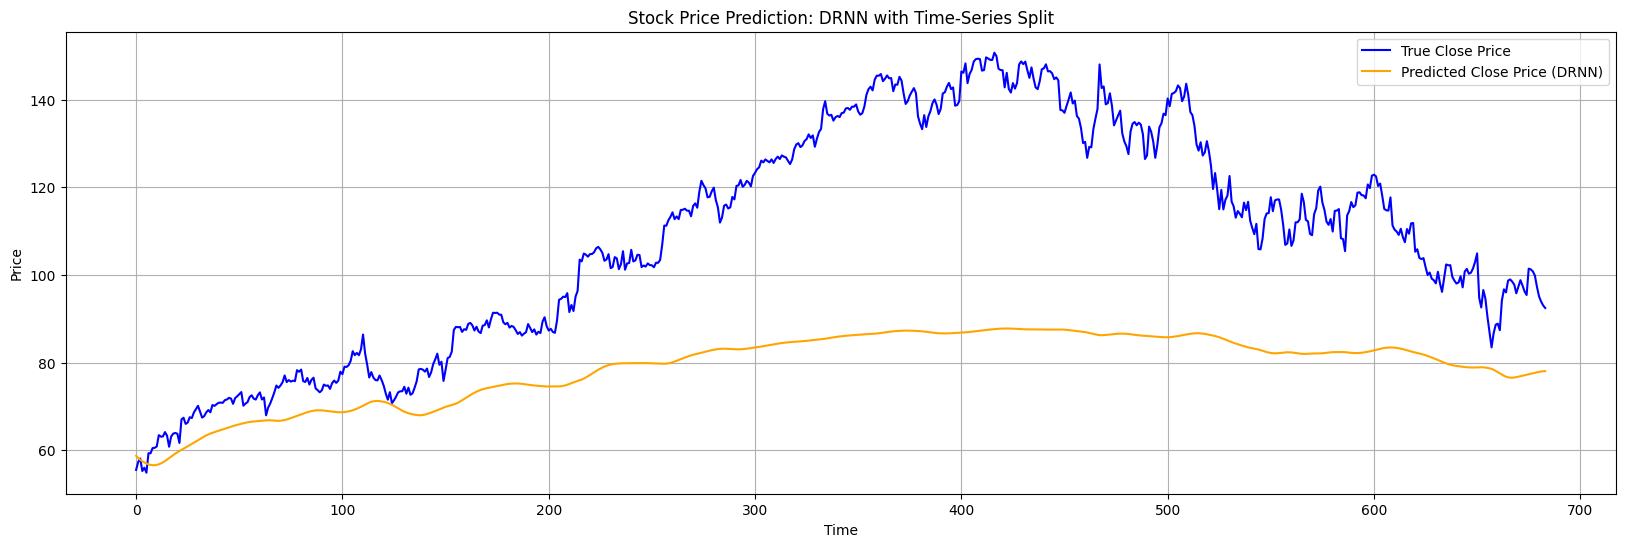

In [53]:
# Make predictions on the test set
y_pred_scaled_drnn = model_drnn.predict(X_test_scaled_drnn)

# Reverse scaling for predictions and true values
y_pred_drnn = scaler_y_drnn.inverse_transform(y_pred_scaled_drnn)
y_test_original_drnn = scaler_y_drnn.inverse_transform(y_test_scaled_drnn)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(y_test_original_drnn, label='True Close Price', color='blue')
plt.plot(y_pred_drnn, label='Predicted Close Price (DRNN)', color='orange')
plt.title('Stock Price Prediction: DRNN with Time-Series Split')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


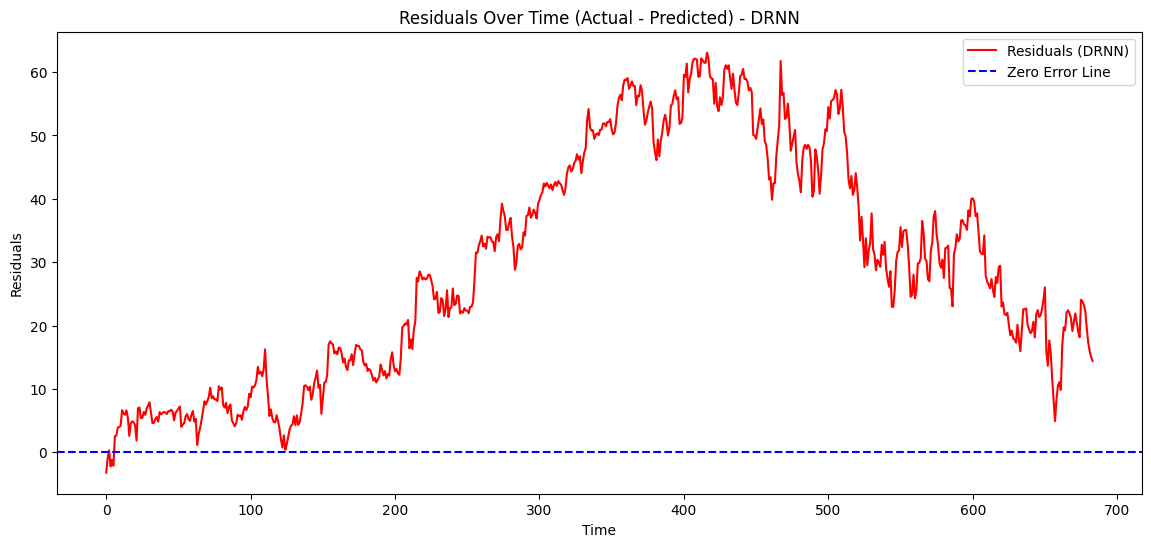

In [54]:
# Reshape y_test_original_drnn and y_pred_drnn to ensure proper dimensions
y_test_original_drnn = y_test_original_drnn.reshape(-1, 1)
y_pred_drnn = y_pred_drnn.reshape(-1, 1)


residuals_drnn = y_test_original_drnn - y_pred_drnn
residuals_drnn = residuals_drnn.flatten()

# Plot residuals over time
plt.figure(figsize=(14, 6))
plt.plot(residuals_drnn, color='red', label='Residuals (DRNN)')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Error Line')
plt.title('Residuals Over Time (Actual - Predicted) - DRNN')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


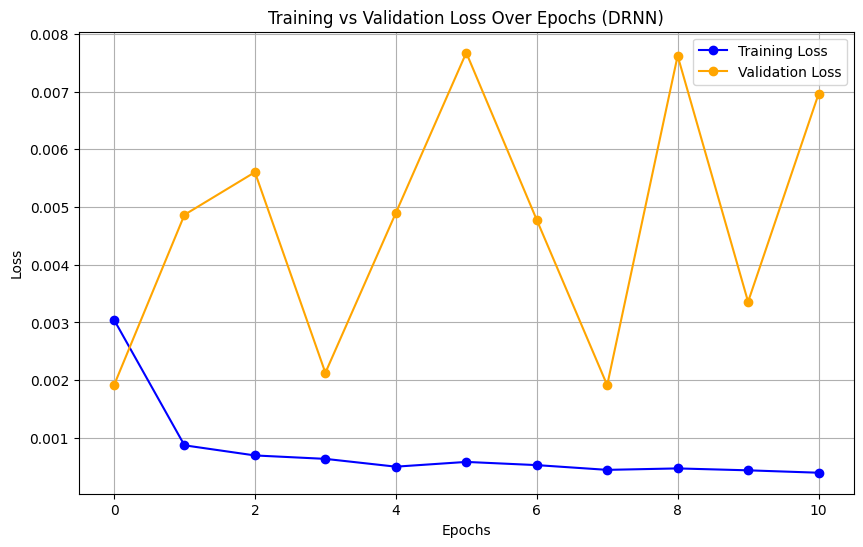

In [55]:


# Extract loss values from the training history
training_loss_drnn = history_drnn.history['loss']
validation_loss_drnn = history_drnn.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss_drnn, label='Training Loss', color='blue', marker='o')
plt.plot(validation_loss_drnn, label='Validation Loss', color='orange', marker='o')
plt.title('Training vs Validation Loss Over Epochs (DRNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# GRU

In [78]:
# Define chronological split sizes
train_size = int(0.7 * len(X))  # 70% for training
val_size = int(0.15 * len(X))   # 15% for validation
test_size = len(X) - train_size - val_size  # Remaining 15% for testing

# Perform chronological split
X_train_gru = X[:train_size]
y_train_gru = y[:train_size]

X_val_gru = X[train_size:train_size + val_size]
y_val_gru = y[train_size:train_size + val_size]

X_test_gru = X[train_size + val_size:]
y_test_gru = y[train_size + val_size:]

# Verify the shapes
print(f"Training set: {X_train_gru.shape}, Validation set: {X_val_gru.shape}, Test set: {X_test_gru.shape}")





from sklearn.preprocessing import MinMaxScaler

# Initialize separate scalers for X and y
scaler_X_gru = MinMaxScaler()
scaler_y_gru = MinMaxScaler()

# Scale features (X)
X_train_scaled_gru = scaler_X_gru.fit_transform(X_train_gru.reshape(-1, X_train_gru.shape[2])).reshape(X_train_gru.shape)
X_val_scaled_gru = scaler_X_gru.transform(X_val_gru.reshape(-1, X_val_gru.shape[2])).reshape(X_val_gru.shape)
X_test_scaled_gru = scaler_X_gru.transform(X_test_gru.reshape(-1, X_test_gru.shape[2])).reshape(X_test_gru.shape)

# Scale target (y)
y_train_scaled_gru = scaler_y_gru.fit_transform(y_train_gru.reshape(-1, 1))
y_val_scaled_gru = scaler_y_gru.transform(y_val_gru.reshape(-1, 1))
y_test_scaled_gru = scaler_y_gru.transform(y_test_gru.reshape(-1, 1))

# Verify the scaling
print(f"Scaled Training Target Range: {y_train_scaled_gru.min()} - {y_train_scaled_gru.max()}")
print(f"Scaled Validation Target Range: {y_val_scaled_gru.min()} - {y_val_scaled_gru.max()}")
print(f"Scaled Test Target Range: {y_test_scaled_gru.min()} - {y_test_scaled_gru.max()}")


Training set: (3186, 60, 4), Validation set: (682, 60, 4), Test set: (684, 60, 4)
Scaled Training Target Range: 0.0 - 0.9999999999999999
Scaled Validation Target Range: 0.9145588059005835 - 1.6023819328212012
Scaled Test Target Range: 1.126686504522318 - 3.252511564715034


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the Enhanced GRU Model
model_gru = Sequential([
    # First GRU layer
    GRU(128, return_sequences=True, input_shape=(X_train_scaled_gru.shape[1], X_train_scaled_gru.shape[2])),
    Dropout(0.3),

    # Second GRU layer
    GRU(128, return_sequences=True),
    Dropout(0.3),

    # Third GRU layer
    GRU(64, return_sequences=False),
    Dropout(0.3),

    # Fully connected dense layers
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the GRU Model with a reduced learning rate
optimizer = Adam(learning_rate=0.0005)
model_gru.compile(
    optimizer=optimizer,
    loss='huber',  # Huber loss for regression tasks
    metrics=['mae']  # Mean Absolute Error as a performance metric
)

# Display the Model Summary
model_gru.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_45 (GRU)                         │ (None, 60, 128)             │          51,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_46 (GRU)                         │ (None, 60, 128)             │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_47 (GRU)                         │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,417 (798.50 KB)

 Trainable params: 204,417 (798.50 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to avoid overfitting
early_stopping_gru = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history_gru = model_gru.fit(
    X_train_scaled_gru, y_train_scaled_gru,
    validation_data=(X_val_scaled_gru, y_val_scaled_gru),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_gru],
    verbose=1
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0144 - mae: 0.1091 - val_loss: 0.0365 - val_mae: 0.2630
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018 - mae: 0.0400 - val_loss: 0.0556 - val_mae: 0.3274
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 - mae: 0.0390 - val_loss: 0.0474 - val_mae: 0.3018
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0010 - mae: 0.0301 - val_loss: 0.0480 - val_mae: 0.3036
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.9591e-04 - mae: 0.0286 - val_loss: 0.0568 - val_mae: 0.3307
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.1992e-04 - mae: 0.0283 - val_loss: 0.0480 - val_mae: 0.3033
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 9.3084e-04 - mae: 0.0280 - val_loss: 0.0720 - val_mae: 0.3730
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.8765e-04 - mae: 0.0260 - val_loss: 0.0645 - val_mae: 0.3527
Epoch 9/50
100/100 ━━━━━━━━━━━━━

Test Loss (GRU): 0.4180
Test MAE (GRU): 0.8621
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


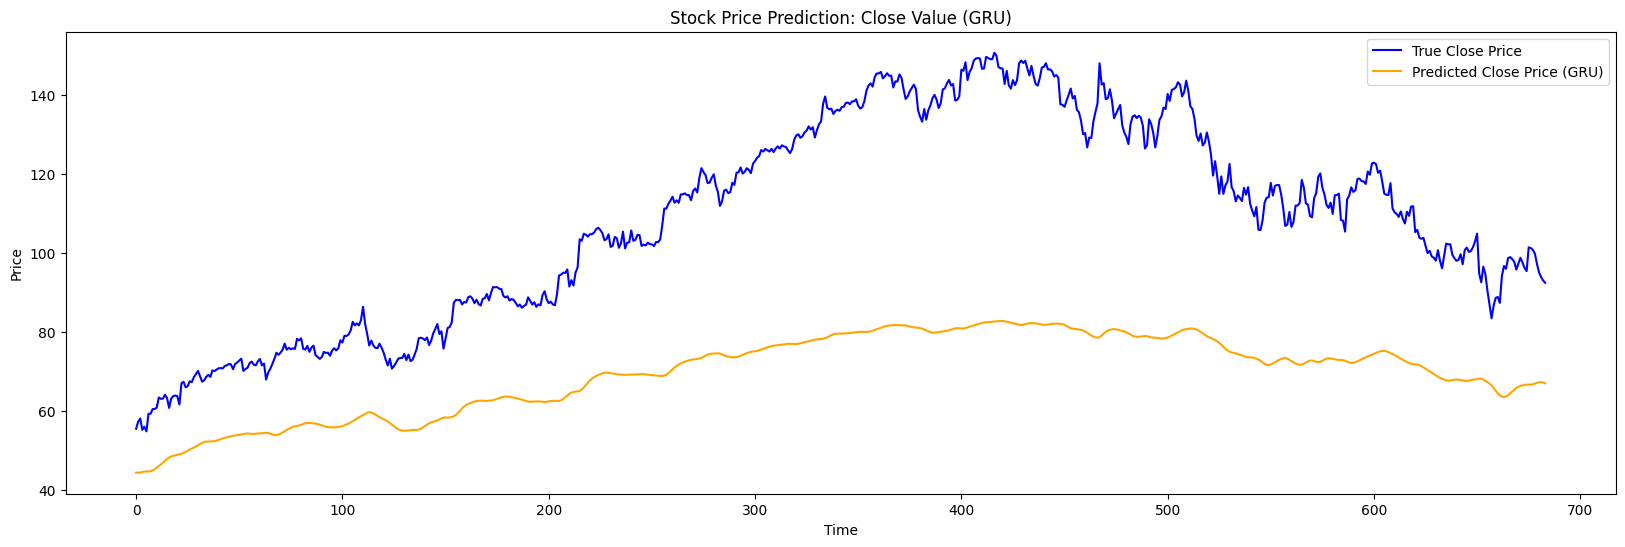

In [95]:
# Evaluate the GRU model on the test set
loss_gru, mae_gru = model_gru.evaluate(X_test_scaled_gru, y_test_scaled_gru, verbose=0)
print(f"Test Loss (GRU): {loss_gru:.4f}")
print(f"Test MAE (GRU): {mae_gru:.4f}")

# Make predictions on the test set using the GRU model
y_pred_scaled_gru = model_gru.predict(X_test_scaled_gru)

# Reverse scaling for predictions and true values
y_pred_gru = scaler_y_gru.inverse_transform(y_pred_scaled_gru)
y_test_original_gru = scaler_y_gru.inverse_transform(y_test_scaled_gru)

# Visualization
plt.figure(figsize=(20, 6))
plt.plot(y_test_original_gru, label='True Close Price', color='blue')
plt.plot(y_pred_gru, label='Predicted Close Price (GRU)', color='orange')
plt.title('Stock Price Prediction: Close Value (GRU)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


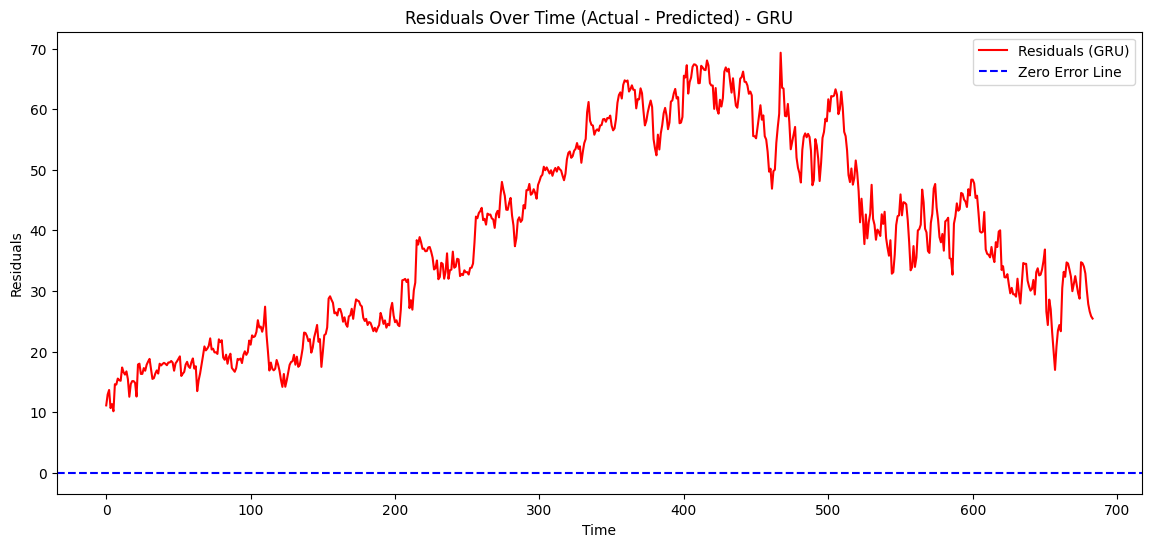

In [96]:
# Reshape y_test_original_gru and y_pred_gru to ensure proper dimensions
y_test_original_gru = y_test_original_gru.reshape(-1, 1)  # Reshape to (samples, 1)
y_pred_gru = y_pred_gru.reshape(-1, 1)  # Reshape to (samples, 1)

# Calculate residuals
residuals_gru = y_test_original_gru - y_pred_gru
residuals_gru = residuals_gru.flatten()

# Plot residuals over time
plt.figure(figsize=(14, 6))
plt.plot(residuals_gru, color='red', label='Residuals (GRU)')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Error Line')
plt.title('Residuals Over Time (Actual - Predicted) - GRU')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


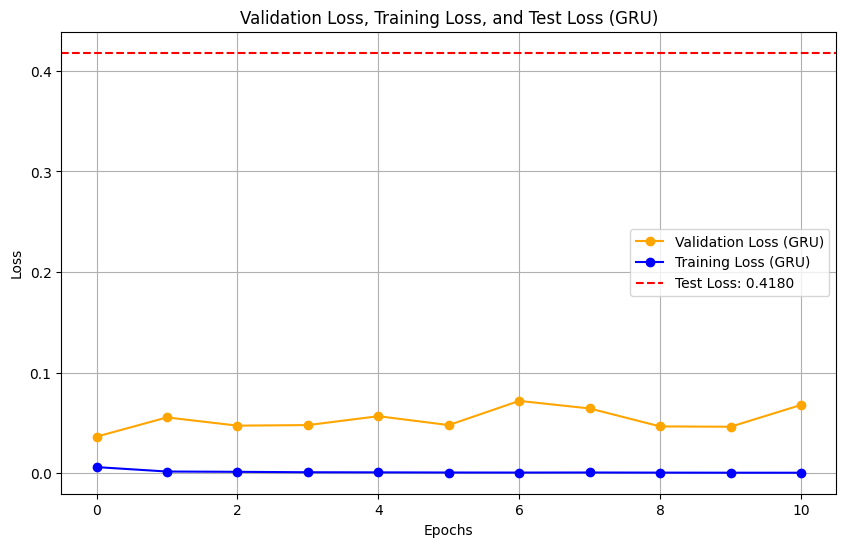

In [97]:
import matplotlib.pyplot as plt

# Extract validation loss from the training history
validation_loss_gru = history_gru.history['val_loss']  # Validation loss over epochs
training_loss_gru = history_gru.history['loss']  # Training loss over epochs

# Evaluate test loss
test_loss_gru, _ = model_gru.evaluate(X_test_scaled_gru, y_test_scaled_gru, verbose=0)  # Test loss

# Plot validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(validation_loss_gru, label='Validation Loss (GRU)', color='orange', marker='o')
plt.plot(training_loss_gru, label='Training Loss (GRU)', color='blue', marker='o')
plt.axhline(y=test_loss_gru, color='red', linestyle='--', label=f'Test Loss: {test_loss_gru:.4f}')
plt.title('Validation Loss, Training Loss, and Test Loss (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Analysis after Feautre Engineering

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Compute additional features
df['Price_Range'] = df['High'] - df['Low']
df['Percentage_Change'] = abs(df['Close'].shift(-1) - df['Close']) / df['Close'] * 100
df['Avg_Volume_10'] = df['Volume'].rolling(window=10).mean()  # 10-day moving average of volume
df['Volume_Spike'] = df['Volume'] / df['Avg_Volume_10']  # Volume spikes

# Drop NaN rows caused by rolling operations
df = df.dropna()

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Volume_Spike', 'Price_Range', 'Percentage_Change']
target = 'Close'

# Convert to NumPy arrays
data_features = df[features].values
data_target = df[target].values

# Function to create sequences
def create_sequences(data_features, data_target, step_size):
    X, y = [], []
    for i in range(len(data_features) - step_size):
        X.append(data_features[i:i + step_size])
        y.append(data_target[i + step_size])
    return np.array(X), np.array(y)

# Sequence parameters
step_size = 30  # Sequence length
X, y = create_sequences(data_features, data_target, step_size)

# Time-series split
train_size = int(0.7 * len(X))  # 70% for training
val_size = int(0.15 * len(X))   # 15% for validation
test_size = len(X) - train_size - val_size  # Remaining 15% for testing

# Chronological split for time series
X_train_lstm_volume = X[:train_size]
y_train_lstm_volume = y[:train_size]

X_val_lstm_volume = X[train_size:train_size + val_size]
y_val_lstm_volume = y[train_size:train_size + val_size]

X_test_lstm_volume = X[train_size + val_size:]
y_test_lstm_volume = y[train_size + val_size:]

print(f"Training set: {X_train_lstm_volume.shape}, Validation set: {X_val_lstm_volume.shape}, Test set: {X_test_lstm_volume.shape}")

# Initialize scalers for features and target
scaler_X_lstm_volume = MinMaxScaler()
scaler_y_lstm_volume = MinMaxScaler()

# Scale features (X)
X_train_scaled_lstm_volume = scaler_X_lstm_volume.fit_transform(X_train_lstm_volume.reshape(-1, X_train_lstm_volume.shape[2])).reshape(X_train_lstm_volume.shape)
X_val_scaled_lstm_volume = scaler_X_lstm_volume.transform(X_val_lstm_volume.reshape(-1, X_val_lstm_volume.shape[2])).reshape(X_val_lstm_volume.shape)
X_test_scaled_lstm_volume = scaler_X_lstm_volume.transform(X_test_lstm_volume.reshape(-1, X_test_lstm_volume.shape[2])).reshape(X_test_lstm_volume.shape)

# Scale target (y)
y_train_scaled_lstm_volume = scaler_y_lstm_volume.fit_transform(y_train_lstm_volume.reshape(-1, 1))
y_val_scaled_lstm_volume = scaler_y_lstm_volume.transform(y_val_lstm_volume.reshape(-1, 1))
y_test_scaled_lstm_volume = scaler_y_lstm_volume.transform(y_test_lstm_volume.reshape(-1, 1))

# Verify data shapes
print("Training Set:", X_train_scaled_lstm_volume.shape, y_train_scaled_lstm_volume.shape)
print("Validation Set:", X_val_scaled_lstm_volume.shape, y_val_scaled_lstm_volume.shape)
print("Test Set:", X_test_scaled_lstm_volume.shape, y_test_scaled_lstm_volume.shape)


Training set: (3200, 30, 7), Validation set: (685, 30, 7), Test set: (687, 30, 7)
Training Set: (3200, 30, 7) (3200, 1)
Validation Set: (685, 30, 7) (685, 1)
Test Set: (687, 30, 7) (687, 1)


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM with Volume model
model_lstm_volume = Sequential([
    LSTM(128, return_sequences=True, input_shape=(step_size, X_train_scaled_lstm_volume.shape[2])),  # Updated input shape
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Predicting the 'Close' price
])

# Compile the model
model_lstm_volume.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm_volume.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                       │ (None, 30, 128)             │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,537 (818.50 KB)

 Trainable params: 209,537 (818.50 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping_lstm_volume = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM with Volume model
history_lstm_volume = model_lstm_volume.fit(
    X_train_scaled_lstm_volume, y_train_scaled_lstm_volume,
    validation_data=(X_val_scaled_lstm_volume, y_val_scaled_lstm_volume),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_lstm_volume],
    verbose=1
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0115 - mae: 0.0630 - val_loss: 0.0185 - val_mae: 0.1271
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mae: 0.0260 - val_loss: 0.0125 - val_mae: 0.1031
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - mae: 0.0240 - val_loss: 0.0020 - val_mae: 0.0344
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mae: 0.0265 - val_loss: 0.0171 - val_mae: 0.1232
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4651e-04 - mae: 0.0203 - val_loss: 0.0051 - val_mae: 0.0607
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9692e-04 - mae: 0.0179 - val_loss: 0.0035 - val_mae: 0.0486
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8423e-04 - mae: 0.0203 - val_loss: 0.0059 - val_mae: 0.0679
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.1935e-04 - mae: 0.0178 - val_loss: 0.0136 - val_mae: 0.1090
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━

Test Loss (LSTM with Volume): 0.3096
Test MAE (LSTM with Volume): 0.4706
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


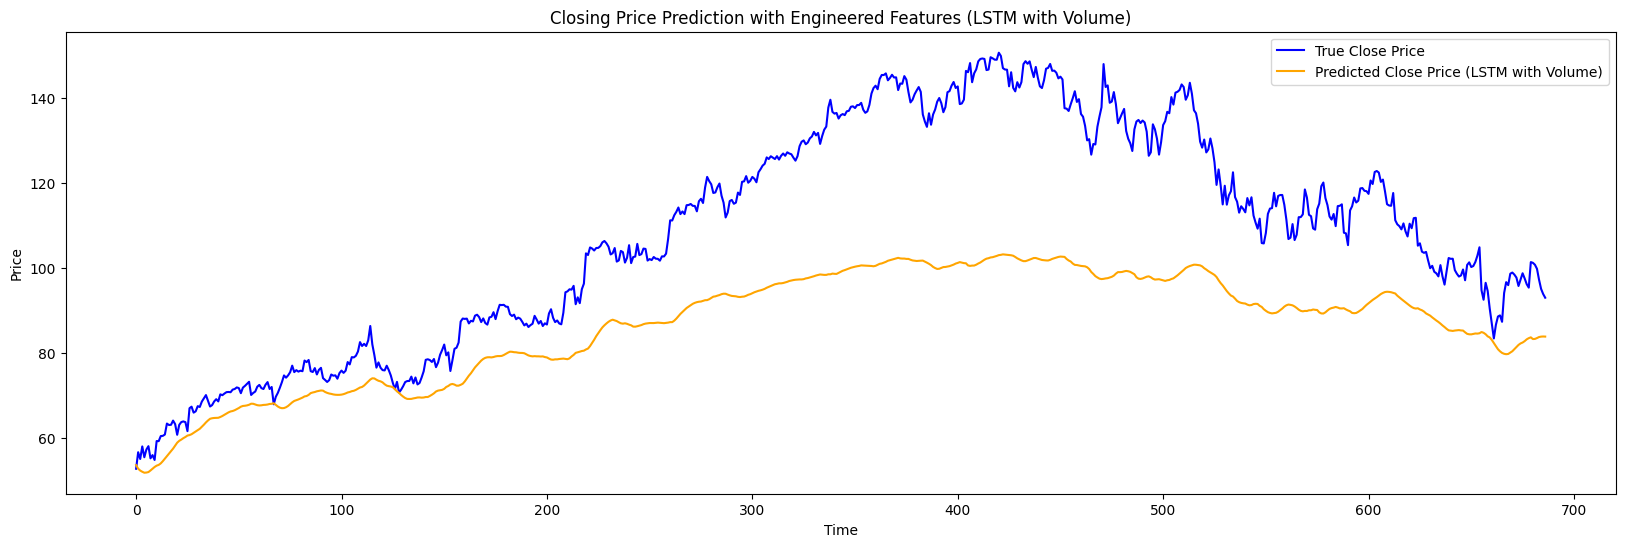

In [101]:
# Evaluate on the test set
loss_lstm_volume, mae_lstm_volume = model_lstm_volume.evaluate(X_test_scaled_lstm_volume, y_test_scaled_lstm_volume, verbose=0)
print(f"Test Loss (LSTM with Volume): {loss_lstm_volume:.4f}")
print(f"Test MAE (LSTM with Volume): {mae_lstm_volume:.4f}")

# Make predictions
y_pred_scaled_lstm_volume = model_lstm_volume.predict(X_test_scaled_lstm_volume)

# Reverse scaling for predictions and true values
y_pred_lstm_volume = scaler_y_lstm_volume.inverse_transform(y_pred_scaled_lstm_volume)
y_test_original_lstm_volume = scaler_y_lstm_volume.inverse_transform(y_test_scaled_lstm_volume)

# Visualization
plt.figure(figsize=(20, 6))
plt.plot(y_test_original_lstm_volume, label='True Close Price', color='blue')
plt.plot(y_pred_lstm_volume, label='Predicted Close Price (LSTM with Volume)', color='orange')
plt.title('Closing Price Prediction with Engineered Features (LSTM with Volume)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


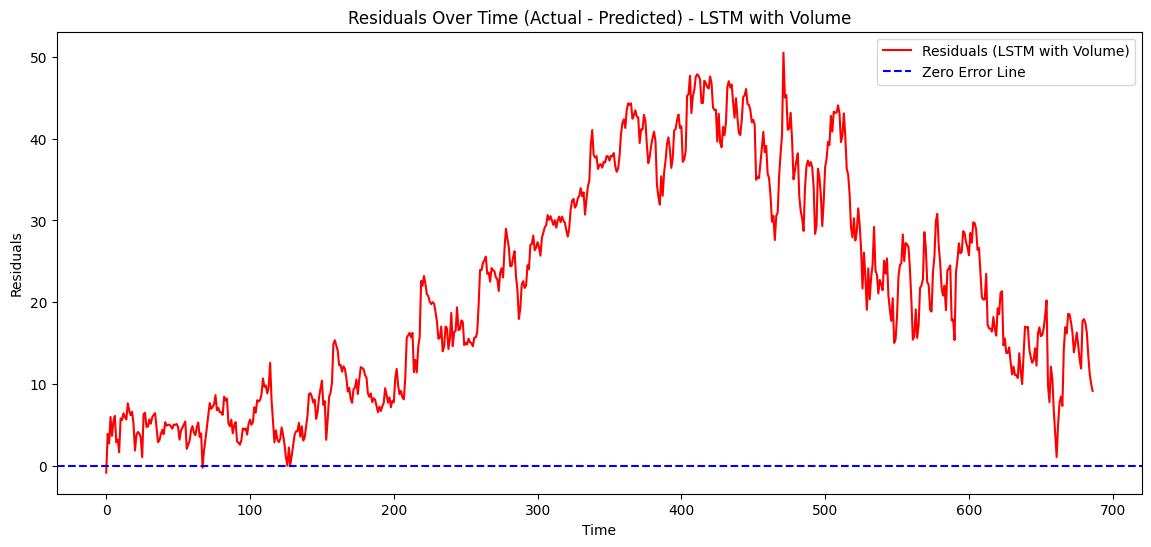

In [102]:
# Reshape y_test_original_lstm_volume and y_pred_lstm_volume to ensure proper dimensions
y_test_original_lstm_volume = y_test_original_lstm_volume.reshape(-1, 1)
y_pred_lstm_volume = y_pred_lstm_volume.reshape(-1, 1)

# Calculate residuals
residuals_lstm_volume = y_test_original_lstm_volume - y_pred_lstm_volume
residuals_lstm_volume = residuals_lstm_volume.flatten()

# Plot residuals over time
plt.figure(figsize=(14, 6))
plt.plot(residuals_lstm_volume, color='red', label='Residuals (LSTM with Volume)')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Error Line')
plt.title('Residuals Over Time (Actual - Predicted) - LSTM with Volume')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


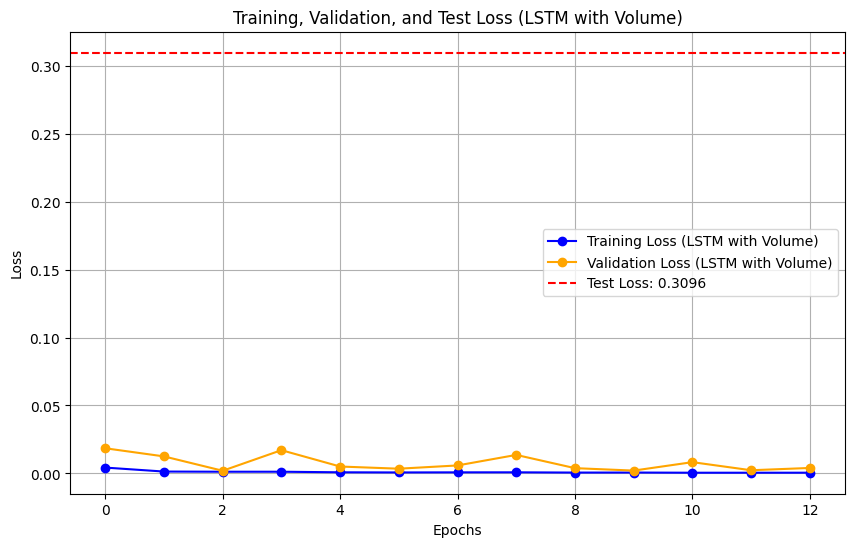

In [103]:
import matplotlib.pyplot as plt

# Extract validation and training loss from the training history
validation_loss_lstm_volume = history_lstm_volume.history['val_loss']
training_loss_lstm_volume = history_lstm_volume.history['loss']

# Evaluate test loss
test_loss_lstm_volume, _ = model_lstm_volume.evaluate(X_test_scaled_lstm_volume, y_test_scaled_lstm_volume, verbose=0)

# Plot validation loss and test loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss_lstm_volume, label='Training Loss (LSTM with Volume)', color='blue', marker='o')
plt.plot(validation_loss_lstm_volume, label='Validation Loss (LSTM with Volume)', color='orange', marker='o')
plt.axhline(y=test_loss_lstm_volume, color='red', linestyle='--', label=f'Test Loss: {test_loss_lstm_volume:.4f}')
plt.title('Training, Validation, and Test Loss (LSTM with Volume)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# GRU with volume

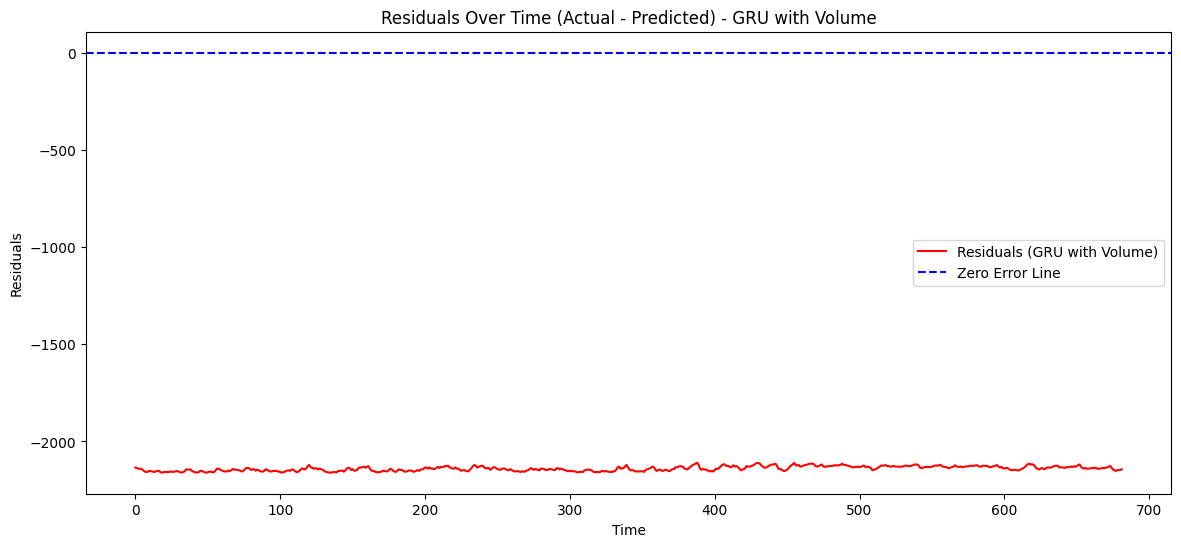

In [125]:
# Ensure predictions match test set length
y_pred_gru_vol = y_pred_gru_vol[:y_test_original_gru_vol.shape[0]]

# Calculate residuals
residuals_gru_vol = y_test_original_gru_vol - y_pred_gru_vol
residuals_gru_vol = residuals_gru_vol.flatten()

# Plot residuals over time
plt.figure(figsize=(14, 6))
plt.plot(residuals_gru_vol, color='red', label='Residuals (GRU with Volume)')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Error Line')
plt.title('Residuals Over Time (Actual - Predicted) - GRU with Volume')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


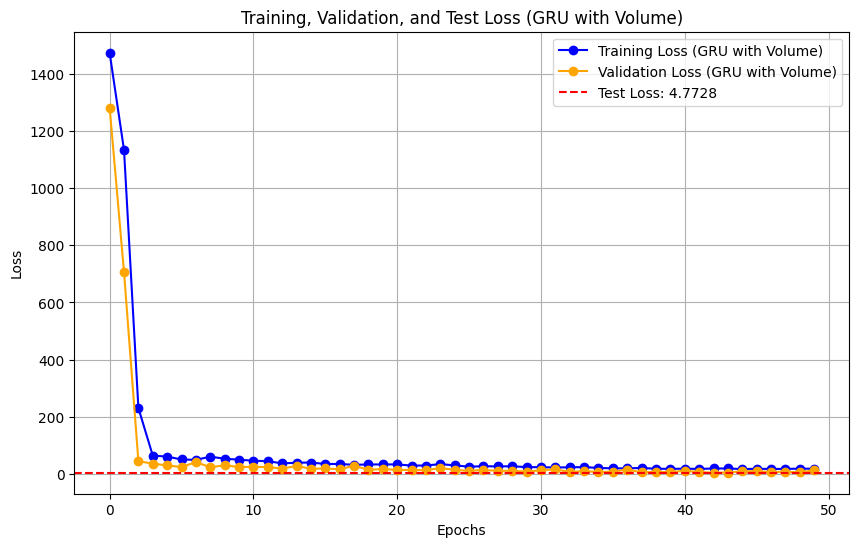

In [ ]:
import matplotlib.pyplot as plt

# Extract training and validation loss from the training history
training_loss_gru_vol = history_gru_vol.history['loss']
validation_loss_gru_vol = history_gru_vol.history['val_loss']

# Evaluate test loss
test_loss_gru_vol, _ = model_gru_vol.evaluate(X_test_scaled_gru_vol, y_test_gru_vol, verbose=0)

# Plot training loss, validation loss, and test loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss_gru_vol, label='Training Loss (GRU with Volume)', color='blue', marker='o')
plt.plot(validation_loss_gru_vol, label='Validation Loss (GRU with Volume)', color='orange', marker='o')
plt.axhline(y=test_loss_gru_vol, color='red', linestyle='--', label=f'Test Loss: {test_loss_gru_vol:.4f}')
plt.title('Training, Validation, and Test Loss (GRU with Volume)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50


<ipython-input-141-a4d45b2f237c>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/google_stock.csv', parse_dates=['Date'])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0235 - mae: 0.0856 - val_loss: 0.0174 - val_mae: 0.1250
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mae: 0.0272 - val_loss: 0.0073 - val_mae: 0.0792
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mae: 0.0222 - val_loss: 0.0040 - val_mae: 0.0556
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.3691e-04 - mae: 0.0208 - val_loss: 0.0077 - val_mae: 0.0816
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.9250e-04 - mae: 0.0191 - val_loss: 0.0112 - val_mae: 0.1007
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8830e-04 - mae: 0.0196 - val_loss: 0.0012 - val_mae: 0.0275
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.2349e-04 - mae: 0.0180 - val_loss: 0.0050 - val_mae: 0.0629
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.9595e-04 - mae: 0.0190 - val_loss: 0.0065 - val_mae: 0.0738
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms

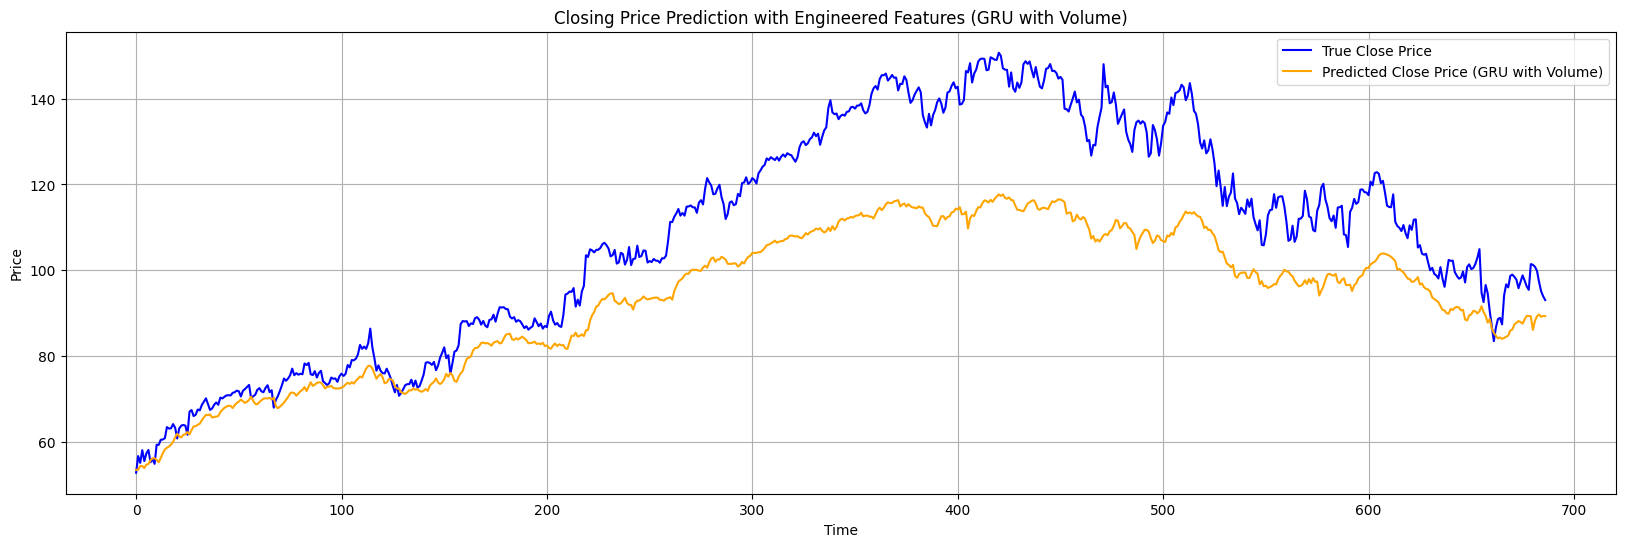

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

df = pd.read_csv('google_stock.csv')
df['Price_Range'] = df['High'] - df['Low']
df['Percentage_Change'] = abs(df['Close'].shift(-1) - df['Close']) / df['Close'] * 100
df['Avg_Volume_10'] = df['Volume'].rolling(window=10).mean()
df['Volume_Spike'] = df['Volume'] / df['Avg_Volume_10']
df = df.dropna()

features = ['Open', 'High', 'Low', 'Volume', 'Volume_Spike', 'Price_Range', 'Percentage_Change']
target = 'Close'
data_features = df[features].values
data_target = df[target].values

def create_sequences(data_features, data_target, step_size):
    X, y = [], []
    for i in range(len(data_features) - step_size):
        X.append(data_features[i:i + step_size])
        y.append(data_target[i + step_size])
    return np.array(X), np.array(y)

step_size = 30
X, y = create_sequences(data_features, data_target, step_size)
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
test_size = len(X) - train_size - val_size

X_train_drnn_volume = X[:train_size]
y_train_drnn_volume = y[:train_size]
X_val_drnn_volume = X[train_size:train_size + val_size]
y_val_drnn_volume = y[train_size:train_size + val_size]
X_test_drnn_volume = X[train_size + val_size:]
y_test_drnn_volume = y[train_size + val_size:]

scaler_X_drnn_volume = MinMaxScaler()
scaler_y_drnn_volume = MinMaxScaler()
X_train_scaled_drnn_volume = scaler_X_drnn_volume.fit_transform(X_train_drnn_volume.reshape(-1, X_train_drnn_volume.shape[2])).reshape(X_train_drnn_volume.shape)
X_val_scaled_drnn_volume = scaler_X_drnn_volume.transform(X_val_drnn_volume.reshape(-1, X_val_drnn_volume.shape[2])).reshape(X_val_drnn_volume.shape)
X_test_scaled_drnn_volume = scaler_X_drnn_volume.transform(X_test_drnn_volume.reshape(-1, X_test_drnn_volume.shape[2])).reshape(X_test_drnn_volume.shape)
y_train_scaled_drnn_volume = scaler_y_drnn_volume.fit_transform(y_train_drnn_volume.reshape(-1, 1))
y_val_scaled_drnn_volume = scaler_y_drnn_volume.transform(y_val_drnn_volume.reshape(-1, 1))
y_test_scaled_drnn_volume = scaler_y_drnn_volume.transform(y_test_drnn_volume.reshape(-1, 1))

model_drnn_volume = Sequential([
    LSTM(128, return_sequences=True, input_shape=(step_size, X_train_scaled_drnn_volume.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

model_drnn_volume.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_drnn_volume.summary()
early_stopping_drnn_volume = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_drnn_volume = model_drnn_volume.fit(
    X_train_scaled_drnn_volume, y_train_scaled_drnn_volume,
    validation_data=(X_val_scaled_drnn_volume, y_val_scaled_drnn_volume),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_drnn_volume],
    verbose=1
)

y_pred_scaled_drnn_volume = model_drnn_volume.predict(X_test_scaled_drnn_volume)
y_pred_drnn_volume = scaler_y_drnn_volume.inverse_transform(y_pred_scaled_drnn_volume.reshape(-1, 1))
y_test_original_drnn_volume = scaler_y_drnn_volume.inverse_transform(y_test_scaled_drnn_volume.reshape(-1, 1))

plt.figure(figsize=(20, 6))
plt.plot(y_test_original_drnn_volume, label='True Close Price', color='blue')
plt.plot(y_pred_drnn_volume, label='Predicted Close Price (DRNN with Volume)', color='orange')
plt.title('Closing Price Prediction with Engineered Features (DRNN with Volume)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


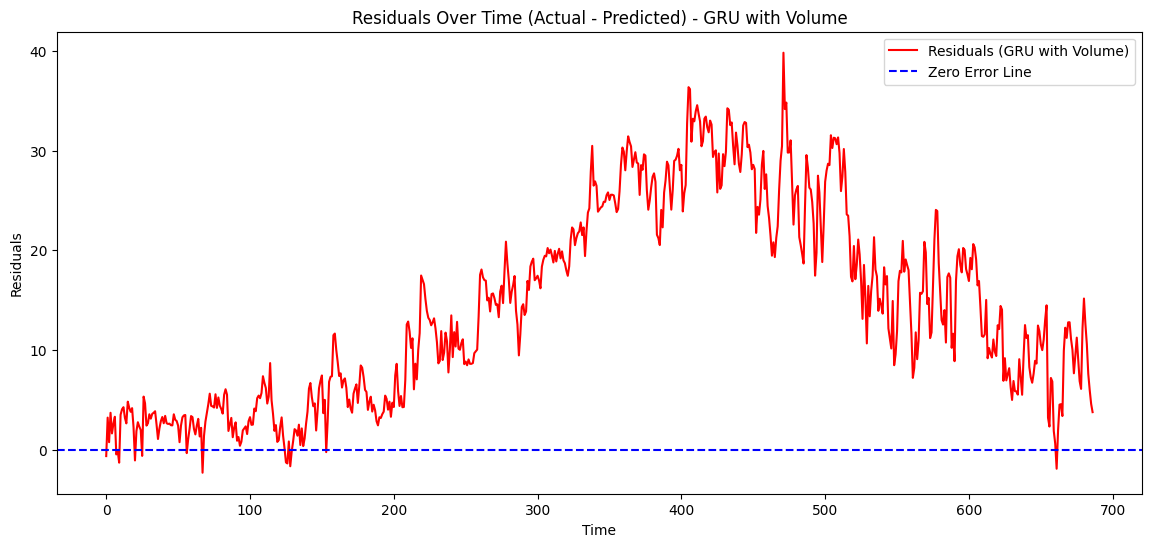

In [142]:
# Ensure predictions match test set length
y_pred_gru_vol = y_pred_gru_vol[:y_test_original_gru_vol.shape[0]]  # Slice y_pred to match y_test length

# Calculate residuals
residuals_gru_vol = y_test_original_gru_vol - y_pred_gru_vol
residuals_gru_vol = residuals_gru_vol.flatten()  # Convert to 1D for plotting

# Plot residuals over time
plt.figure(figsize=(14, 6))
plt.plot(residuals_gru_vol, color='red', label='Residuals (GRU with Volume)')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Error Line')
plt.title('Residuals Over Time (Actual - Predicted) - GRU with Volume')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


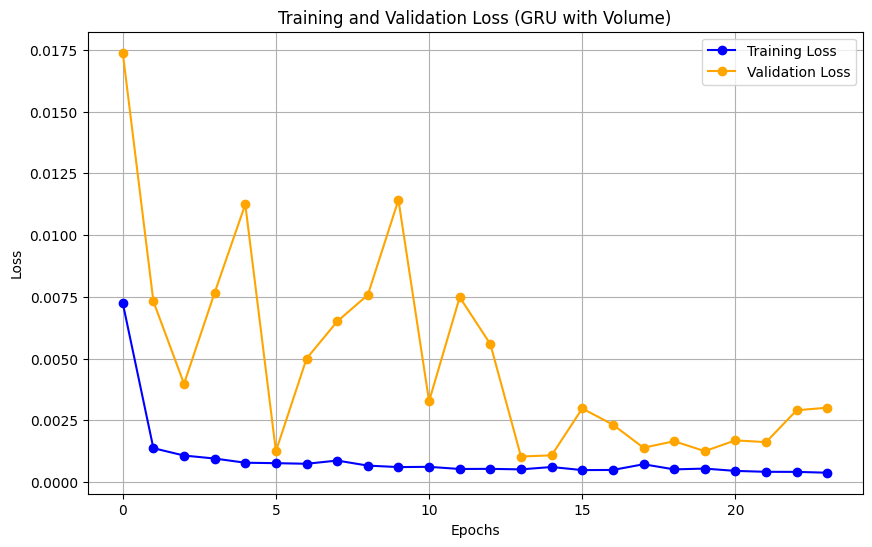

In [148]:
# Extract training and validation loss from the training history
training_loss_gru_vol = history_gru_vol.history['loss']  # Training loss over epochs
validation_loss_gru_vol = history_gru_vol.history['val_loss']  # Validation loss over epochs

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss_gru_vol, label='Training Loss', color='blue', marker='o')
plt.plot(validation_loss_gru_vol, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss (GRU with Volume)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


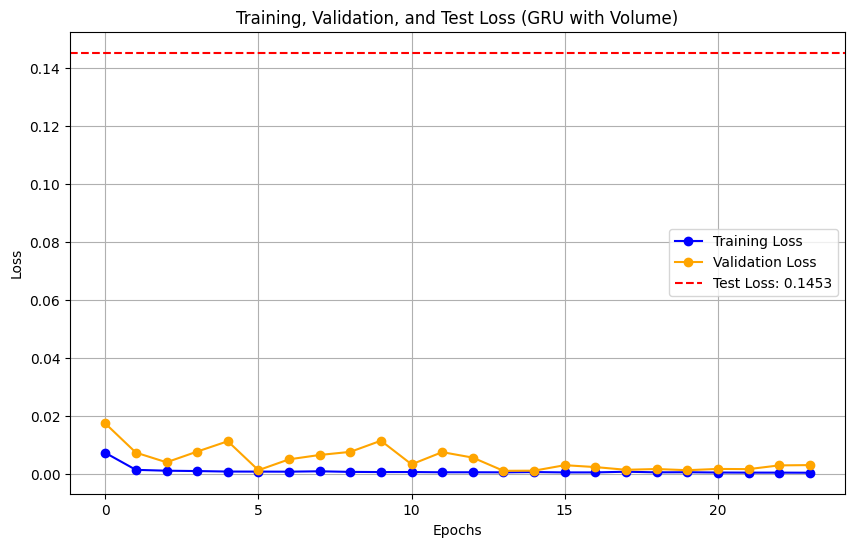

In [149]:
# Evaluate test loss
test_loss_gru_vol, _ = model_gru_vol.evaluate(X_test_scaled_gru_volume, y_test_scaled_gru_volume, verbose=0)

# Plot training, validation, and test loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss_gru_vol, label='Training Loss', color='blue', marker='o')
plt.plot(validation_loss_gru_vol, label='Validation Loss', color='orange', marker='o')
plt.axhline(y=test_loss_gru_vol, color='red', linestyle='--', label=f'Test Loss: {test_loss_gru_vol:.4f}')
plt.title('Training, Validation, and Test Loss (GRU with Volume)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# DRNN with Volume Implementation

Training set: (3200, 30, 7), Validation set: (685, 30, 7), Test set: (687, 30, 7)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 30, 128)             │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_96 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_97 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_98 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 341,121 (1.30 MB)

 Trainable params: 341,121 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0192 - mae: 0.0854 - val_loss: 0.0069 - val_mae: 0.0649
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022 - mae: 0.0324 - val_loss: 0.0060 - val_mae: 0.0605
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - mae: 0.0267 - val_loss: 0.0072 - val_mae: 0.0717
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - mae: 0.0247 - val_loss: 0.0036 - val_mae: 0.0475
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - mae: 0.0224 - val_loss: 0.0104 - val_mae: 0.0904
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - mae: 0.0226 - val_loss: 0.0031 - val_mae: 0.0426
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 0.0059 - val_mae: 0.0654
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.2593e-04 - mae: 0.0202 - val_loss: 0.0053 - val_mae: 0.0595
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 1

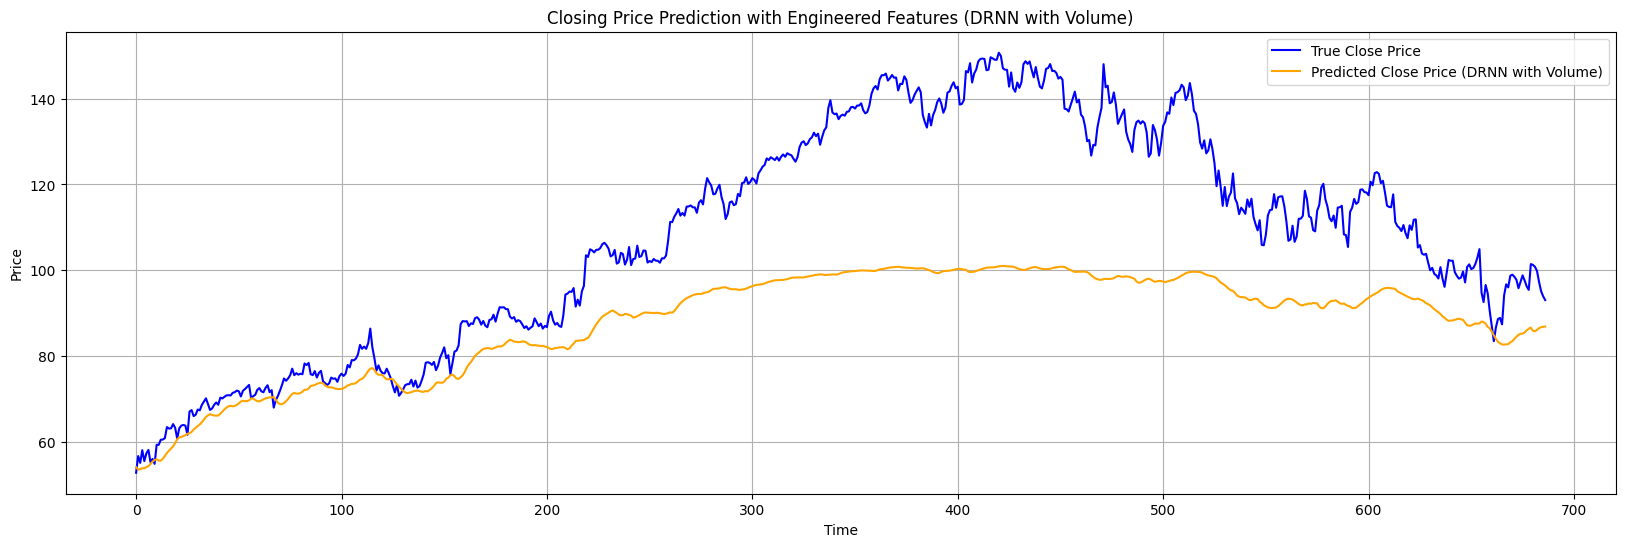

In [144]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

df = pd.read_csv('google_stock.csv')
df['Price_Range'] = df['High'] - df['Low']
df['Percentage_Change'] = abs(df['Close'].shift(-1) - df['Close']) / df['Close'] * 100
df['Avg_Volume_10'] = df['Volume'].rolling(window=10).mean()
df['Volume_Spike'] = df['Volume'] / df['Avg_Volume_10']
df = df.dropna()

features = ['Open', 'High', 'Low', 'Volume', 'Volume_Spike', 'Price_Range', 'Percentage_Change']
target = 'Close'
data_features = df[features].values
data_target = df[target].values

def create_sequences(data_features, data_target, step_size):
    X, y = [], []
    for i in range(len(data_features) - step_size):
        X.append(data_features[i:i + step_size])
        y.append(data_target[i + step_size])
    return np.array(X), np.array(y)

step_size = 30
X, y = create_sequences(data_features, data_target, step_size)
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
test_size = len(X) - train_size - val_size

X_train_drnn_volume = X[:train_size]
y_train_drnn_volume = y[:train_size]
X_val_drnn_volume = X[train_size:train_size + val_size]
y_val_drnn_volume = y[train_size:train_size + val_size]
X_test_drnn_volume = X[train_size + val_size:]
y_test_drnn_volume = y[train_size + val_size:]

scaler_X_drnn_volume = MinMaxScaler()
scaler_y_drnn_volume = MinMaxScaler()
X_train_scaled_drnn_volume = scaler_X_drnn_volume.fit_transform(X_train_drnn_volume.reshape(-1, X_train_drnn_volume.shape[2])).reshape(X_train_drnn_volume.shape)
X_val_scaled_drnn_volume = scaler_X_drnn_volume.transform(X_val_drnn_volume.reshape(-1, X_val_drnn_volume.shape[2])).reshape(X_val_drnn_volume.shape)
X_test_scaled_drnn_volume = scaler_X_drnn_volume.transform(X_test_drnn_volume.reshape(-1, X_test_drnn_volume.shape[2])).reshape(X_test_drnn_volume.shape)
y_train_scaled_drnn_volume = scaler_y_drnn_volume.fit_transform(y_train_drnn_volume.reshape(-1, 1))
y_val_scaled_drnn_volume = scaler_y_drnn_volume.transform(y_val_drnn_volume.reshape(-1, 1))
y_test_scaled_drnn_volume = scaler_y_drnn_volume.transform(y_test_drnn_volume.reshape(-1, 1))

model_drnn_volume = Sequential([
    LSTM(128, return_sequences=True, input_shape=(step_size, X_train_scaled_drnn_volume.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

model_drnn_volume.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_drnn_volume.summary()
early_stopping_drnn_volume = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_drnn_volume = model_drnn_volume.fit(
    X_train_scaled_drnn_volume, y_train_scaled_drnn_volume,
    validation_data=(X_val_scaled_drnn_volume, y_val_scaled_drnn_volume),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_drnn_volume],
    verbose=1
)

y_pred_scaled_drnn_volume = model_drnn_volume.predict(X_test_scaled_drnn_volume)
y_pred_drnn_volume = scaler_y_drnn_volume.inverse_transform(y_pred_scaled_drnn_volume.reshape(-1, 1))
y_test_original_drnn_volume = scaler_y_drnn_volume.inverse_transform(y_test_scaled_drnn_volume.reshape(-1, 1))

plt.figure(figsize=(20, 6))
plt.plot(y_test_original_drnn_volume, label='True Close Price', color='blue')
plt.plot(y_pred_drnn_volume, label='Predicted Close Price (DRNN with Volume)', color='orange')
plt.title('Closing Price Prediction with Engineered Features (DRNN with Volume)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


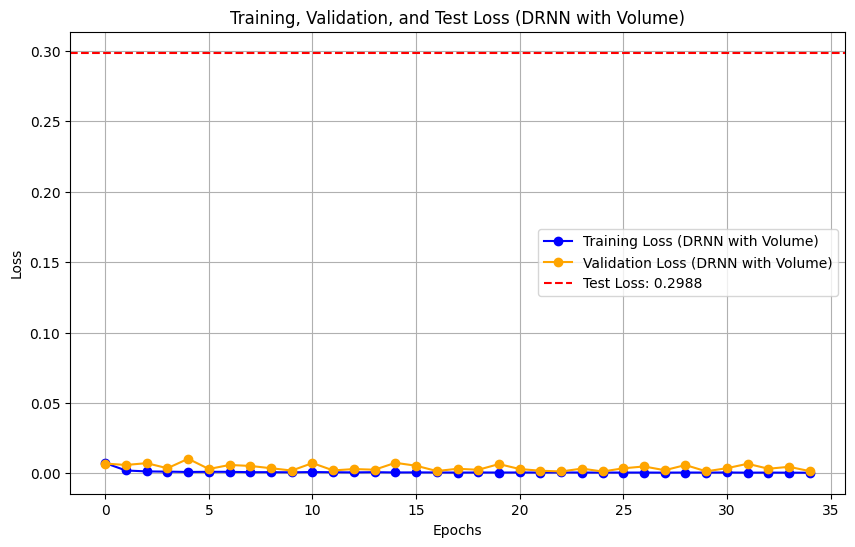

In [151]:
# Extract training and validation loss from the training history
training_loss_drnn_volume = history_drnn_volume.history['loss']  # Training loss over epochs
validation_loss_drnn_volume = history_drnn_volume.history['val_loss']  # Validation loss over epochs

# Evaluate test loss
test_loss_drnn_volume, _ = model_drnn_volume.evaluate(X_test_scaled_drnn_volume, y_test_scaled_drnn_volume, verbose=0)

# Plot training, validation, and test loss
plt.figure(figsize=(10, 6))
plt.plot(training_loss_drnn_volume, label='Training Loss (DRNN with Volume)', color='blue', marker='o')
plt.plot(validation_loss_drnn_volume, label='Validation Loss (DRNN with Volume)', color='orange', marker='o')
plt.axhline(y=test_loss_drnn_volume, color='red', linestyle='--', label=f'Test Loss: {test_loss_drnn_volume:.4f}')
plt.title('Training, Validation, and Test Loss (DRNN with Volume)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()




# Model Evaluation

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Model Metrics Comparison:
                Model          MAE           MSE         RMSE            R²
0                LSTM     9.991049  1.645262e+02    12.826776  7.501117e-01
1    LSTM with Volume    21.498847  6.461292e+02    25.419071  3.737596e-02
2                 GRU    38.854838  1.761916e+03    41.975188 -1.676062e+00
3     GRU with Volume     1.017645  1.302598e+00     1.141314 -2.580061e+28
4                DRNN    29.468199  1.197279e+03    34.601714 -8.184696e-01
5    DRNN with Volume  4829.975138  2.468817e+07  4968.718997 -1.716356e+01
6    Multi-Layer LSTM    28.384349  1.084041e+03    32.924770 -6.464795e-01
7  Bidirectional LSTM     7.584600  1.081398e+02    1

,Model,MAE,MSE,RMSE,R²
0,LSTM,9.991049,1.645262e+02,12.826776,7.501117e-01
1,LSTM with Volume,21.498847,6.461292e+02,25.419071,3.737596e-02
2,GRU,38.854838,1.761916e+03,41.975188,-1.676062e+00
3,GRU with Volume,1.017645,1.302598e+00,1.141314,-2.580061e+28
4,DRNN,29.468199,1.197279e+03,34.601714,-8.184696e-01
5,DRNN with Volume,4829.975138,2.468817e+07,4968.718997,-1.716356e+01
6,Multi-Layer LSTM,28.384349,1.084041e+03,32.924770,-6.464795e-01
7,Bidirectional LSTM,7.584600,1.081398e+02,10.399031,8.357533e-01


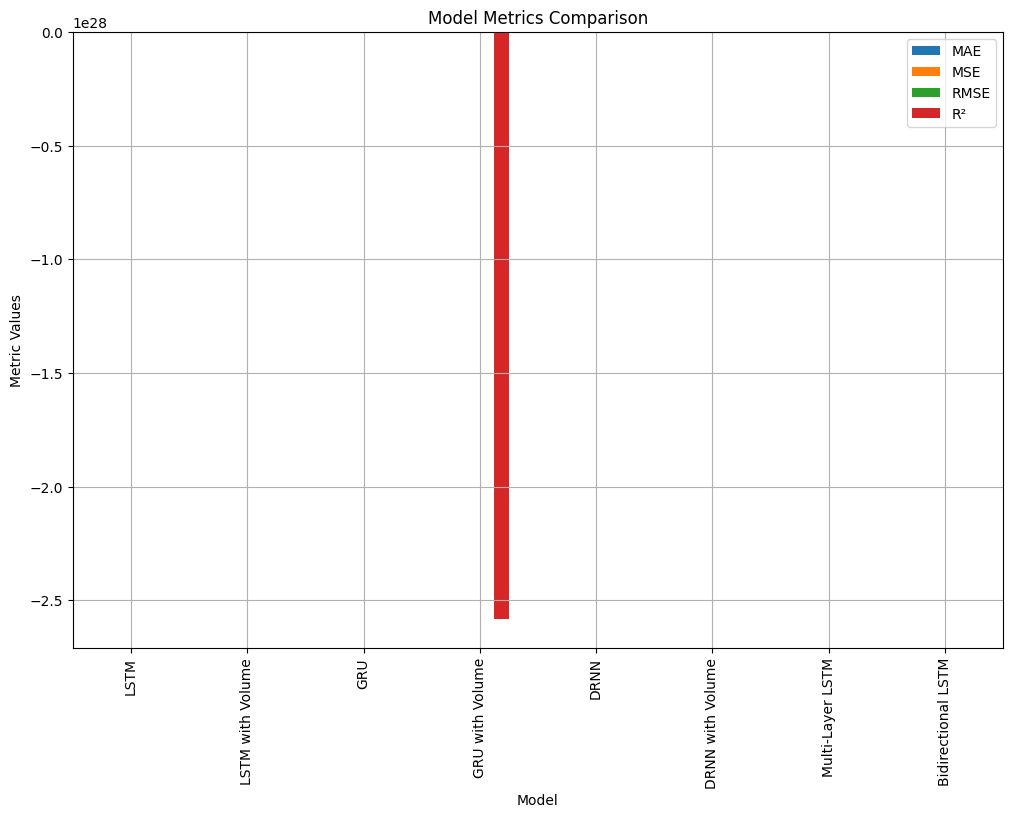

In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define a function to compute evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

# Collect metrics for all models
model_metrics = []

# LSTM
y_pred_lstm = scaler_y_lstm.inverse_transform(model_lstm.predict(X_test_scaled_lstm))
y_test_original_lstm = scaler_y_lstm.inverse_transform(y_test_scaled_lstm.reshape(-1, 1))
model_metrics.append(evaluate_model(y_test_original_lstm, y_pred_lstm, "LSTM"))

# LSTM with Volume
y_pred_lstm_vol = scaler_y_lstm_volume.inverse_transform(model_lstm_volume.predict(X_test_scaled_lstm_volume))
y_test_original_lstm_vol = scaler_y_lstm_volume.inverse_transform(y_test_scaled_lstm_volume.reshape(-1, 1))
model_metrics.append(evaluate_model(y_test_original_lstm_vol, y_pred_lstm_vol, "LSTM with Volume"))

# GRU
y_pred_gru = scaler_y_gru.inverse_transform(model_gru.predict(X_test_scaled_gru))
y_test_original_gru = scaler_y_gru.inverse_transform(y_test_scaled_gru.reshape(-1, 1))
model_metrics.append(evaluate_model(y_test_original_gru, y_pred_gru, "GRU"))

# GRU with Volume
y_pred_gru_vol = scaler_y_gru_vol.inverse_transform(model_gru_vol.predict(X_test_scaled_gru_vol))
y_test_original_gru_vol = scaler_y_gru_vol.inverse_transform(y_test_scaled_gru_vol.reshape(-1, 1))
model_metrics.append(evaluate_model(y_test_original_gru_vol, y_pred_gru_vol, "GRU with Volume"))

# DRNN
y_pred_drnn = scaler_y_drnn.inverse_transform(model_drnn.predict(X_test_scaled_drnn))
y_test_original_drnn = scaler_y_drnn.inverse_transform(y_test_scaled_drnn.reshape(-1, 1))
model_metrics.append(evaluate_model(y_test_original_drnn, y_pred_drnn, "DRNN"))

# DRNN with Volume
y_pred_drnn_vol = scaler_y_drnn_vol.inverse_transform(model_drnn_vol.predict(X_test_scaled_drnn_vol))
y_test_original_drnn_vol = scaler_y_drnn_vol.inverse_transform(y_test_drnn_vol.reshape(-1, 1))
model_metrics.append(evaluate_model(y_test_original_drnn_vol, y_pred_drnn_vol, "DRNN with Volume"))

# Multi-Layer LSTM
y_pred_lstm_multi = scaler_y_lstm.inverse_transform(model_lstm_multi.predict(X_test_scaled_lstm))
y_test_original_lstm_multi = scaler_y_lstm.inverse_transform(y_test_scaled_lstm.reshape(-1, 1))
model_metrics.append(evaluate_model(y_test_original_lstm_multi, y_pred_lstm_multi, "Multi-Layer LSTM"))

# Bidirectional LSTM
y_pred_bidirectional_lstm = scaler_y_lstm.inverse_transform(model_bidirectional_lstm.predict(X_test_scaled_lstm))
y_test_original_bidirectional_lstm = scaler_y_lstm.inverse_transform(y_test_scaled_lstm.reshape(-1, 1))
model_metrics.append(evaluate_model(y_test_original_bidirectional_lstm, y_pred_bidirectional_lstm, "Bidirectional LSTM"))

# Create a DataFrame to compare metrics
metrics_df = pd.DataFrame(model_metrics)

# Display the metrics for comparison
print("Model Metrics Comparison:")
print(metrics_df)

# Optional: Display as an interactive table if supported
try:
    from IPython.display import display
    display(metrics_df)
except ImportError:
    print("Interactive display not available. Printing DataFrame.")




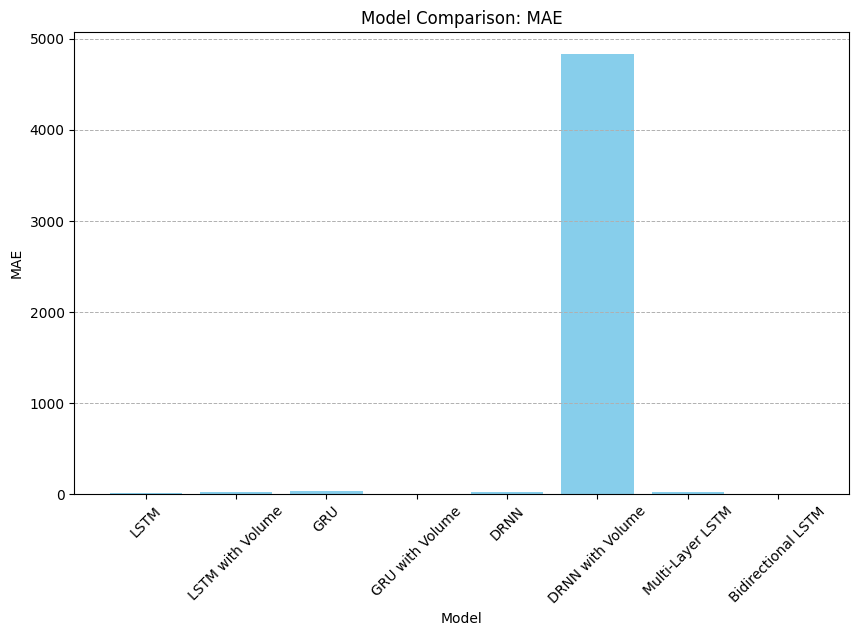

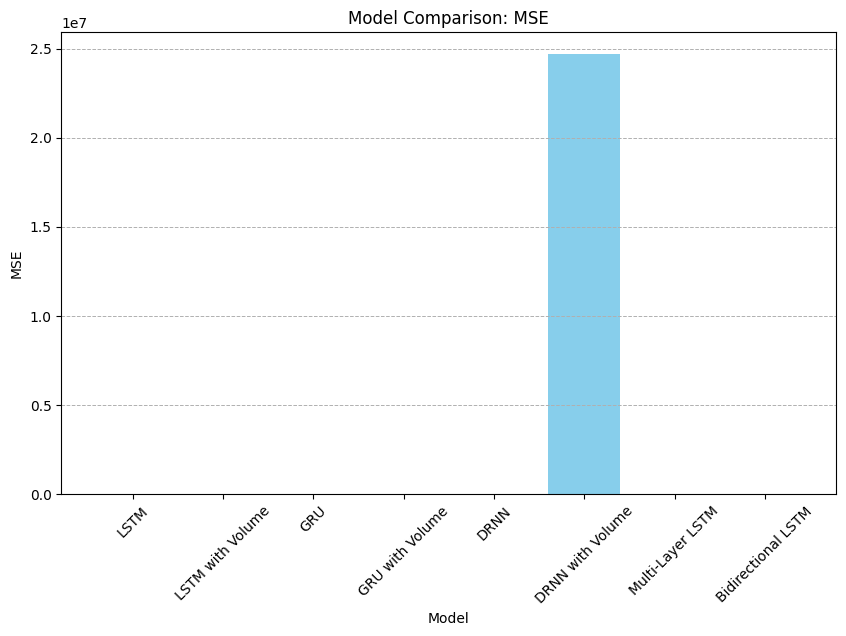

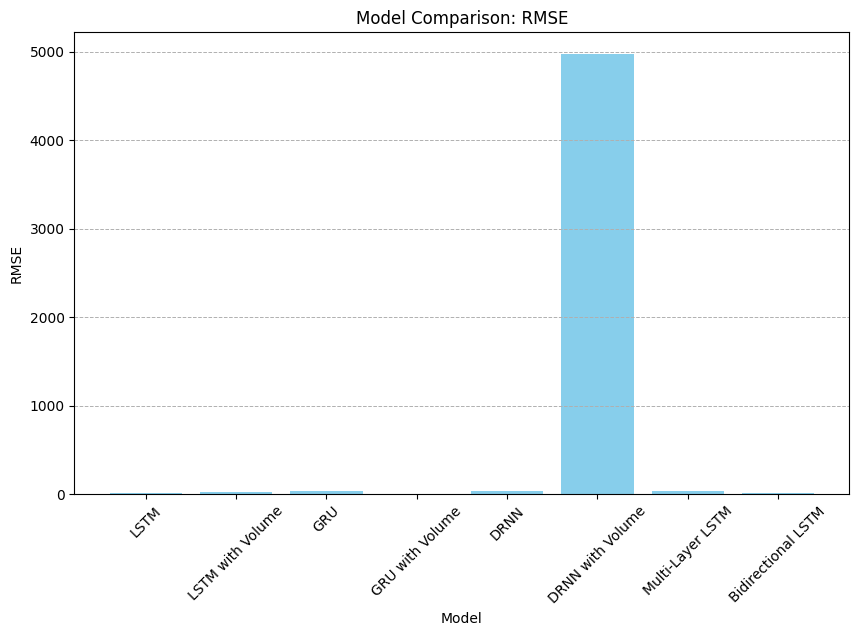

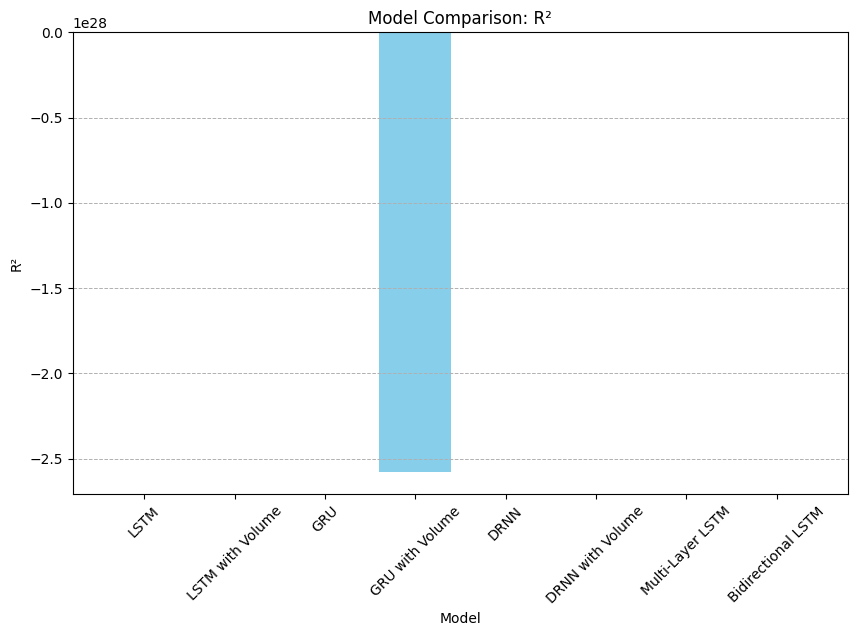

In [157]:
import matplotlib.pyplot as plt

# Plot each metric separately for all models
metrics = ["MAE", "MSE", "RMSE", "R²"]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df["Model"], metrics_df[metric], color='skyblue')
    plt.title(f'Model Comparison: {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.show()


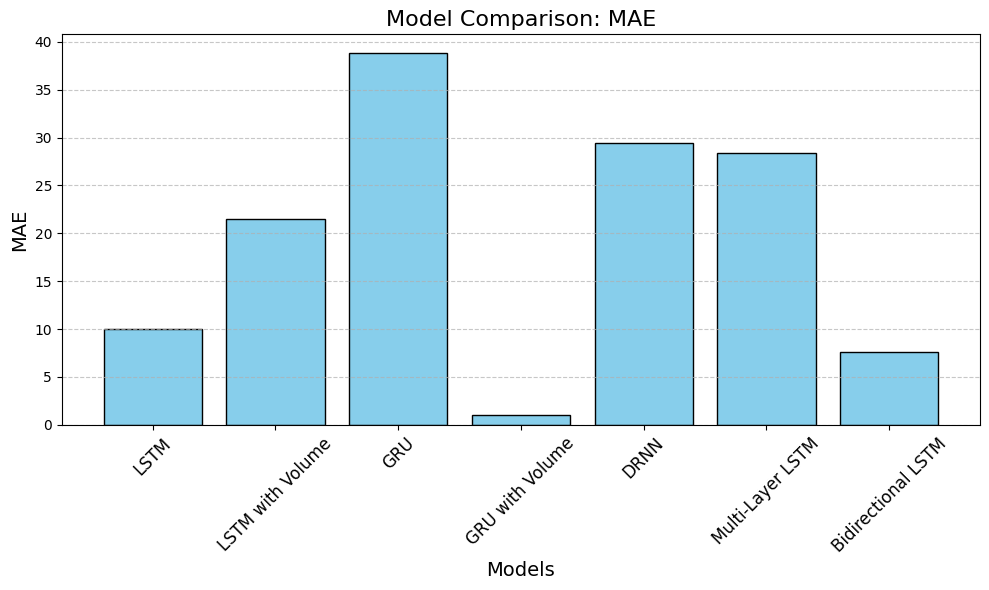

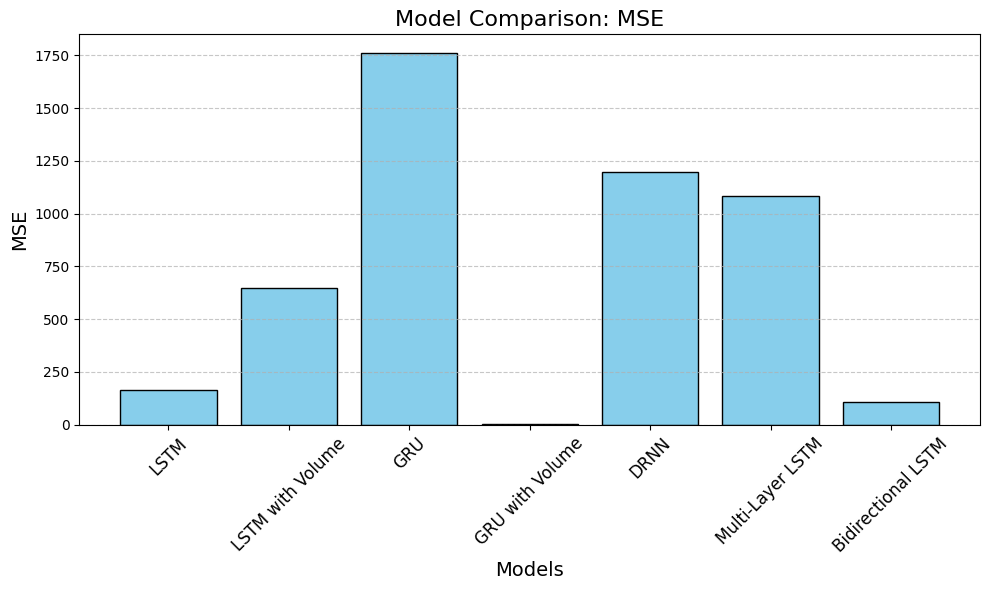

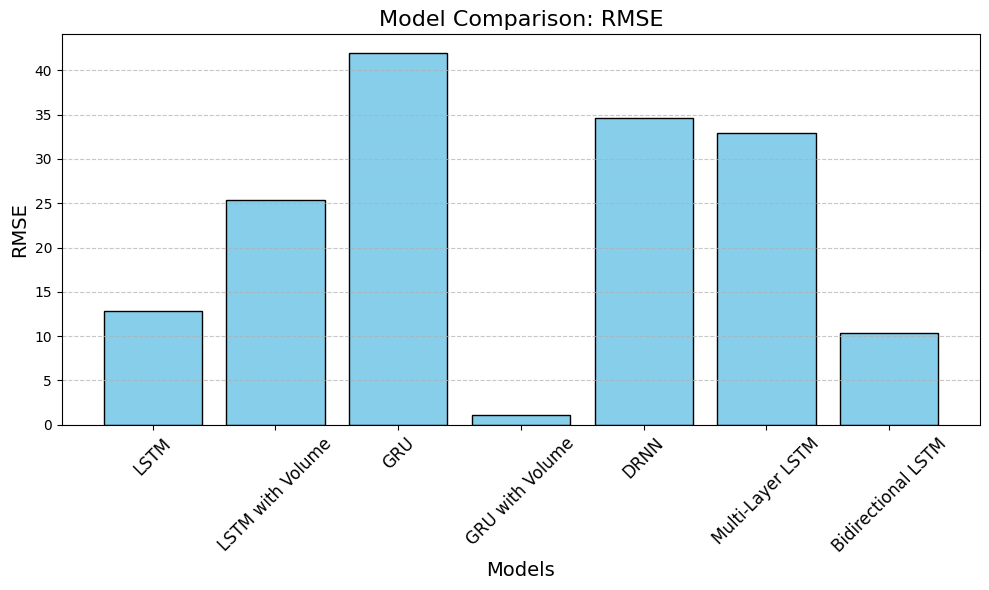

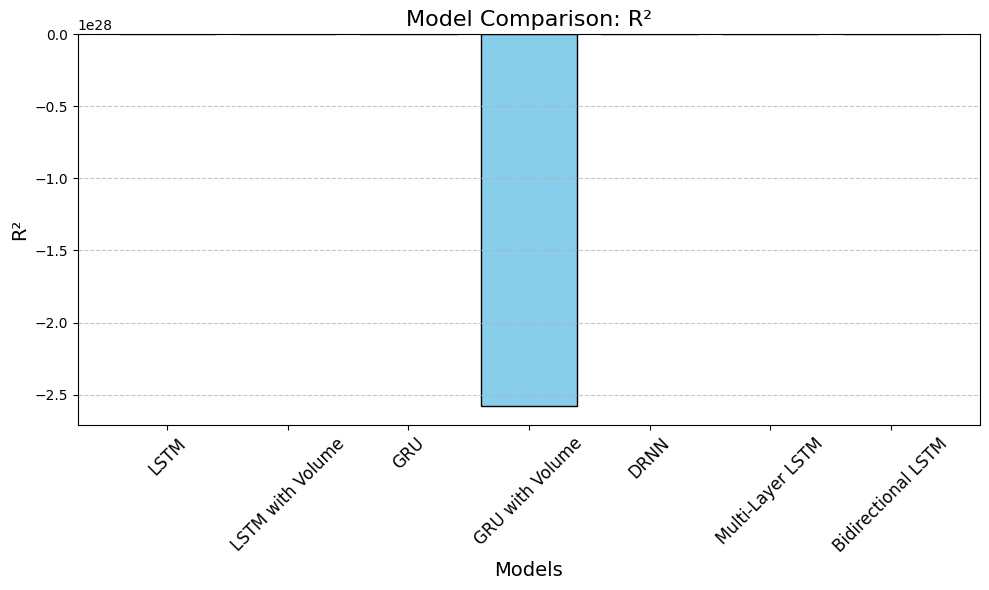

In [158]:
import matplotlib.pyplot as plt

# Exclude DRNN with Volume from metrics_df
filtered_metrics_df = metrics_df[metrics_df["Model"] != "DRNN with Volume"]

# Define the metrics to plot
metrics_to_plot = ["MAE", "MSE", "RMSE", "R²"]

# Generate separate plots for each metric
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_metrics_df["Model"], filtered_metrics_df[metric], color='skyblue', edgecolor='black')
    plt.title(f'Model Comparison: {metric}', fontsize=16)
    plt.xlabel('Models', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
